# **Credit Score Analysis** 



### Import Libraries

In [310]:
#Data-set Analysis lib
import pandas as pd
import numpy as np

#Data-set Visualization lib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
import matplotlib.image as mpimg
import seaborn as sns

#warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [311]:
# Load Dataset
bank_df = pd.read_csv('dataset.csv')

### Dataset First View

In [312]:
# Dataset First Look
bank_df.head()

ID  Customer_ID  Month            Name        Age          SSN Occupation  \
0   1      25795.0     12   Sarah Johnson  28.570826  586441997.0      Pilot   
1   2      10860.0     12   Sarah Johnson  50.333239  913869329.0     Doctor   
2   3      86820.0     10     John Miller  65.936802  517229274.0     Doctor   
3   4      64886.0      3    Emily Wilson  47.658499  243242760.0     Artist   
4   5      16265.0      5  Michael Wilson  64.411540  155415825.0        NaN   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0  192890.366581           10861.476340                3.0  ...         Bad   
1  144796.648139            4283.154383                2.0  ...        Good   
2  124552.214863            5811.864825                3.0  ...         Bad   
3            NaN            6416.874199                1.0  ...         Bad   
4  147703.911920            2260.127503                1.0  ...        Good   

   Outstanding_Debt  Credit_Utilization_Ratio Credit_History_Age  \
0      34426.078345                  0.574354          28.969547   
1      27900.872020                  0.634938           7.503323   
2      47989.905860                  0.708469          36.959161   
3      17572.325155                  0.347012          19.766421   
4      41799.407690                  0.211851          21.020600   

   Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                    Yes          4914.981723               716.831213   
1                     No          1730.020020               979.902230   
2                     No          2632.389662               719.445028   
3                     No          2988.469957              2212.597429   
4                     No          1407.817811              1363.533163   

                  Payment_Behaviour Monthly_Balance  Credit_Score  
0   High_spent_Large_value_payments    18340.289446          Good  
1    Low_spent_Large_value_payments     2761.115088          Poor  
2    Low_spent_Large_value_payments    16902.835885          Good  
3  High_spent_Medium_value_payments      555.170461          Good  
4    Low_spent_Large_value_payments    14533.340311          Poor  

[5 rows x 28 columns]

### Dataset Rows & Columns count

In [313]:
# Dataset Rows & Columns count
print(f'Number of Rows in {bank_df.shape[0]}')
print(f'Number of Columns in {bank_df.shape[1]}')

Number of Rows in 203
Number of Columns in 28


### Dataset Information

In [314]:
# Dataset Info
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        203 non-null    int64  
 1   Customer_ID               202 non-null    float64
 2   Month                     203 non-null    int64  
 3   Name                      201 non-null    object 
 4   Age                       203 non-null    float64
 5   SSN                       200 non-null    float64
 6   Occupation                201 non-null    object 
 7   Annual_Income             202 non-null    float64
 8   Monthly_Inhand_Salary     202 non-null    float64
 9   Num_Bank_Accounts         201 non-null    float64
 10  Num_Credit_Card           201 non-null    float64
 11  Interest_Rate             201 non-null    float64
 12  Num_of_Loan               202 non-null    float64
 13  Type_of_Loan              203 non-null    object 
 14  Delay_from

#### Duplicate Values

In [315]:
# Dataset Duplicate Value Count
bank_df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [316]:
# Missing Values/Null Values Count
bank_df.isnull().sum()

ID                          0
Customer_ID                 1
Month                       0
Name                        2
Age                         0
SSN                         3
Occupation                  2
Annual_Income               1
Monthly_Inhand_Salary       1
Num_Bank_Accounts           2
Num_Credit_Card             2
Interest_Rate               2
Num_of_Loan                 1
Type_of_Loan                0
Delay_from_due_date         1
Num_of_Delayed_Payment      2
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  2
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       1
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           1
Monthly_Balance             2
Credit_Score                0
dtype: int64

In [317]:
# Visualizing the missing 
def apply_chart_styling(ax,fig,title,subtitle,insight_text,logo_path = 'images/logo.png'):

    fig.patch.set_facecolor('#D3D3D3')
    ax.set_facecolor('#D3D3D3')

    fig.text(0.09,1.05 , title,fontsize = 18 , fontweight = 'bold', fontfamily = 'serif')
    fig.text(0.09,0.99 , subtitle,fontsize = 12,fontweight = 'bold',fontfamily = 'serif')

    fig.text(1.1, 1.01, 'Insight\n\n', fontsize = 16, fontweight = 'bold',fontfamily = 'serif')
    fig.text(1.1, 0.50, insight_text, fontsize = 16, fontweight = 'bold',fontfamily = 'serif')

    logo = mpimg.imread(logo_path)
    logo_ax = fig.add_axes([1.5,0.85,0.1,0.1])
    logo_ax.imshow(logo)
    logo_ax.axis('off')

    ax.grid(axis = 'y',linestyle = '-', alpha = 0.4)
    ax.set_axisbelow(True)

    for spine in ['top','right','left']:
        ax.spines[spine].set_visible(False)

    ax.tick_params(axis = 'both',which = 'major', labelsize = 12)

    l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
    fig.lines.extend([l1])

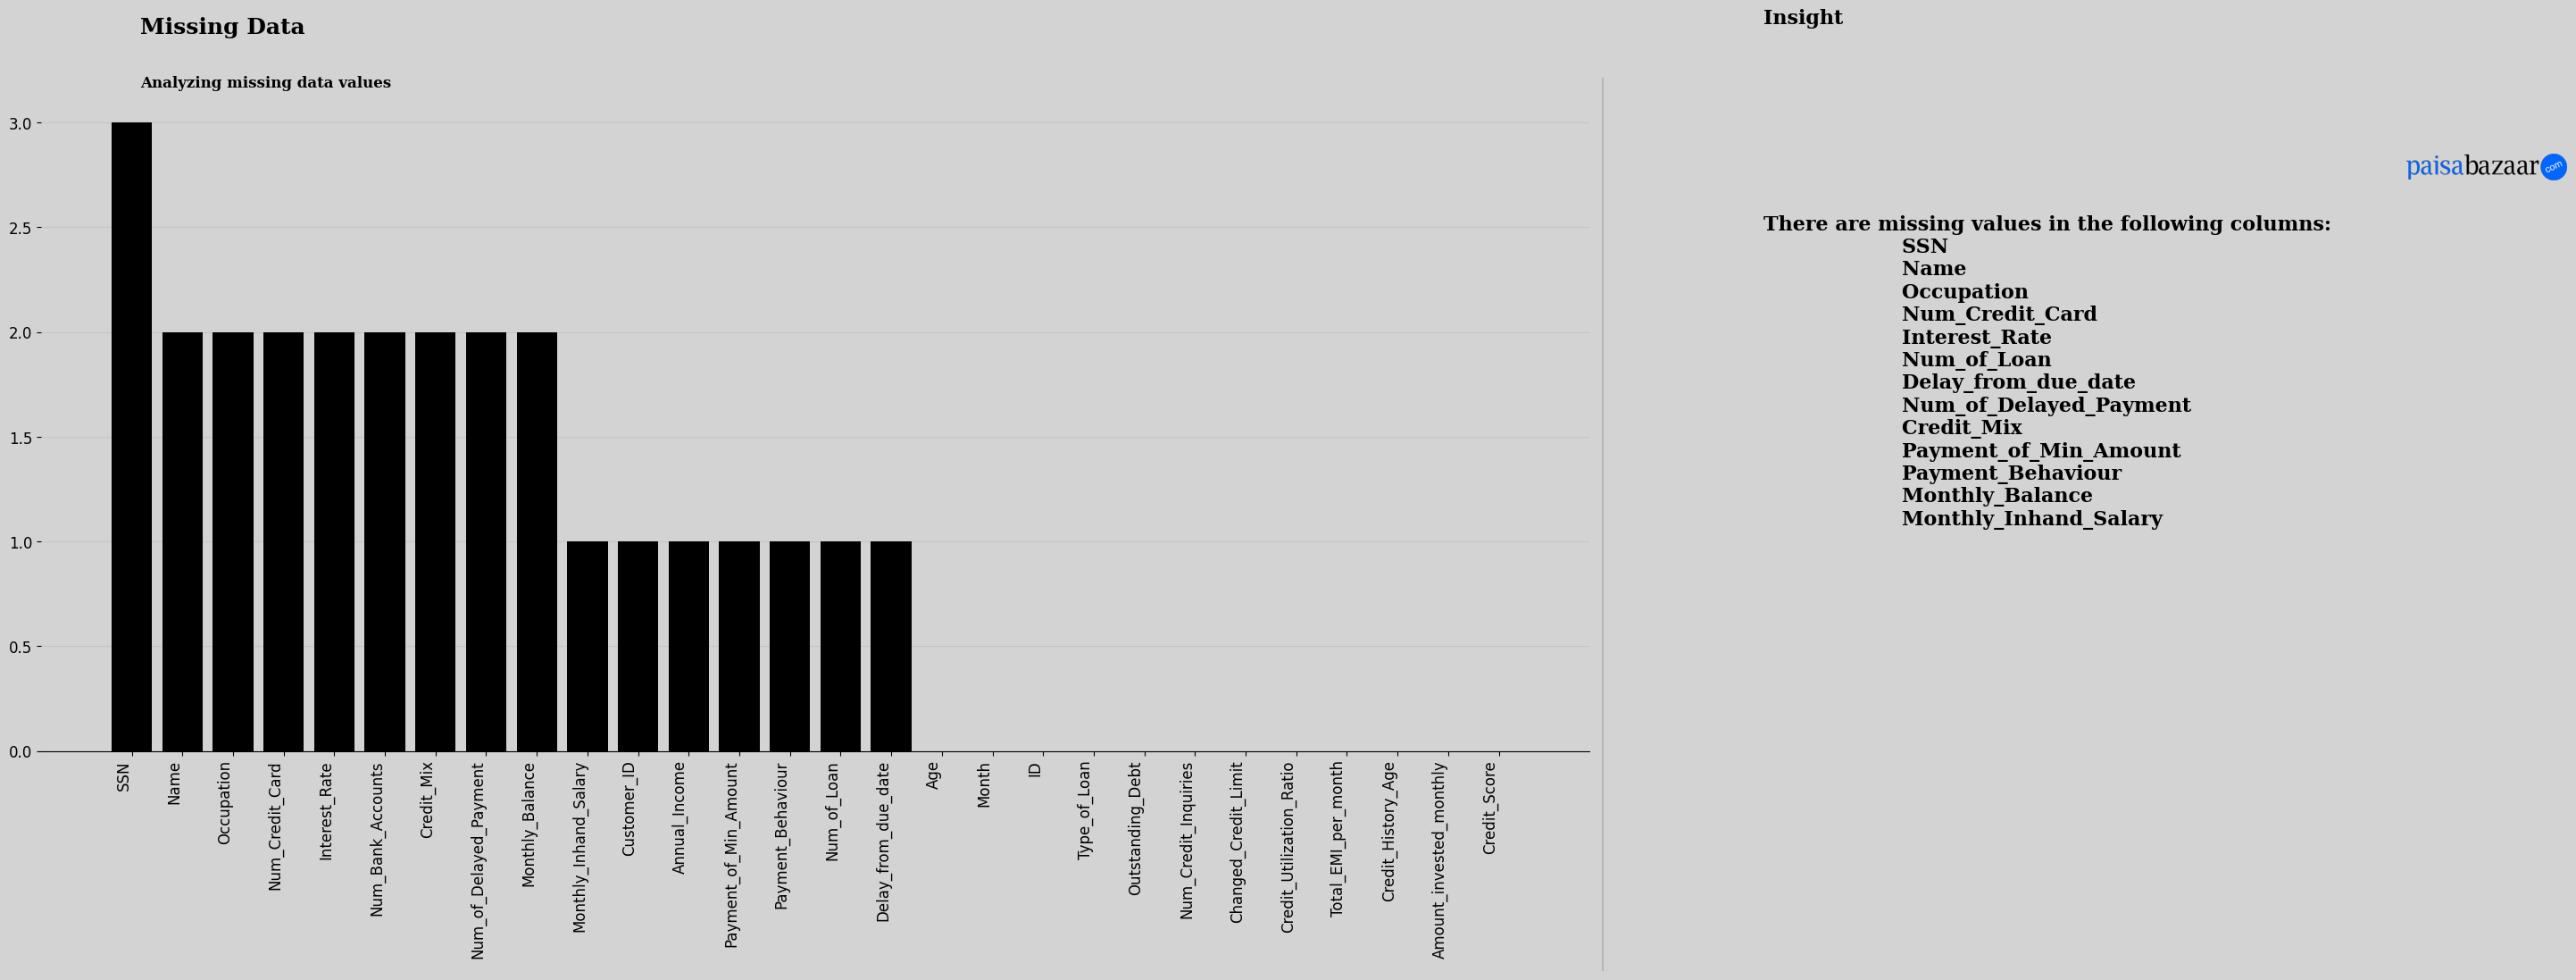

In [318]:
missing_data = bank_df.isnull().sum().sort_values(ascending = False)

fig,ax = plt.subplots(1,1,figsize = (18,10))

bars = ax.bar(missing_data.index,missing_data.values,color = 'black')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

apply_chart_styling(ax = ax, fig = fig, title = 'Missing Data' , subtitle = 'Analyzing missing data values', 
                    insight_text = '''There are missing values in the following columns:
                    SSN
                    Name
                    Occupation
                    Num_Credit_Card
                    Interest_Rate
                    Num_of_Loan
                    Delay_from_due_date
                    Num_of_Delayed_Payment
                    Credit_Mix                  
                    Payment_of_Min_Amount       
                    Payment_Behaviour           
                    Monthly_Balance             
                    Monthly_Inhand_Salary''')

plt.tight_layout()
plt.show()

## ***Understanding Variables***

In [319]:
# Dataset Columns
bank_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [320]:
# Dataset Describe
bank_df.describe()

ID   Customer_ID       Month         Age           SSN  \
count  203.000000    202.000000  203.000000  203.000000  2.000000e+02   
mean   102.000000  57294.806931    6.458128   43.702839  5.189752e+08   
std     58.745213  26836.817315    3.616788   14.733368  2.543859e+08   
min      1.000000  10206.000000    1.000000   18.415516  1.025211e+08   
25%     51.500000  33692.000000    3.000000   30.885956  2.800046e+08   
50%    102.000000  60747.500000    7.000000   43.639306  5.138662e+08   
75%    152.500000  77867.500000   10.000000   56.706689  7.112191e+08   
max    203.000000  99812.000000   12.000000   69.005089  9.922946e+08   

       Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count     202.000000             202.000000         201.000000   
mean   111213.314278            8174.387772           2.930348   
std     53753.707277            3747.254835           1.343549   
min     20023.096708            2016.582311           1.000000   
25%     65507.944346            4950.609580           2.000000   
50%    111430.602416            7798.197267           3.000000   
75%    157172.764910           11168.562048           4.000000   
max    199054.133327           14781.604452           5.000000   

       Num_Credit_Card  Interest_Rate  ...  Delay_from_due_date  \
count       201.000000     201.000000  ...           202.000000   
mean          2.338308       8.387203  ...            24.643564   
std           1.129148       4.048619  ...            14.551732   
min           1.000000       1.534773  ...             0.000000   
25%           1.000000       4.818646  ...            12.250000   
50%           2.000000       8.424697  ...            24.000000   
75%           3.000000      12.011762  ...            36.000000   
max           4.000000      14.962074  ...            49.000000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count              201.000000            203.000000            203.000000   
mean                 7.666667           -274.923356              4.339901   
std                  4.382161           2825.264848              2.948021   
min                  0.000000          -4919.725447              0.000000   
25%                  4.000000          -2554.055435              1.500000   
50%                  8.000000           -520.240801              5.000000   
75%                 12.000000           2104.134054              7.000000   
max                 14.000000           4935.620436              9.000000   

       Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
count        203.000000                203.000000          203.000000   
mean       24860.438796                  0.515930           21.368749   
std        14248.943003                  0.288538           11.250135   
min         1087.070960                  0.009126            1.056765   
25%        13123.373045                  0.266934           11.895319   
50%        24175.712041                  0.510469           21.765209   
75%        38399.411434                  0.786269           31.094329   
max        49988.050353                  0.994559           39.869026   

       Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance  
count           203.000000               203.000000       201.000000  
mean           2808.704378              1515.863722      9070.170234  
std            1256.781255               847.560366      6241.407007  
min             511.277865               111.286146     -1619.406935  
25%            1807.092419               776.907156      3742.607891  
50%            2768.743092              1469.926214      8754.511074  
75%            3889.254321              2291.320010     14746.324243  
max            4959.675005              2999.082070     19734.088378  

[8 rows x 21 columns]

### Variables Description


1. **ID**: Unique identifier for each record.
2. **Customer_ID**: Unique identifier for each customer.
3. **Month**: Month of data collection or financial activity.
4. **Name**: Customer’s name (likely anonymized).
5. **Age**: Age of the customer.
6. **SSN**: Social Security Number (likely anonymized).
7. **Occupation**: Job title or role of the customer.
8. **Annual_Income**: Total income earned by the customer in a year.
9. **Monthly_Inhand_Salary**: Net salary received by the customer monthly.
10. **Num_Bank_Accounts**: Number of bank accounts held by the customer.
11. **Num_Credit_Card**: Number of credit cards owned by the customer.
12. **Interest_Rate**: Interest rate applicable to the customer’s loans or credit.
13. **Num_of_Loan**: Total number of loans taken by the customer.
14. **Type_of_Loan**: Categories of loans taken (e.g., personal, home, auto).
15. **Delay_from_due_date**: Average delay in payments from the due date.
16. **Num_of_Delayed_Payment**: Count of payments that were delayed.
17. **Changed_Credit_Limit**: Any changes made to the customer’s credit limit.
18. **Num_Credit_Inquiries**: Number of inquiries made on the customer’s credit report.
19. **Credit_Mix**: Composition of credit accounts (e.g., revolving, installment).
20. **Outstanding_Debt**: Total amount of debt currently owed by the customer.
21. **Credit_Utilization_Ratio**: Percentage of available credit being used.
22. **Credit_History_Age**: Length of time the customer has had credit accounts.
23. **Payment_of_Min_Amount**: Indicator of whether the customer pays the minimum amount due.
24. **Total_EMI_per_month**: Total equated monthly installment payments.
25. **Amount_invested_monthly**: Amount of money the customer invests each month.
26. **Payment_Behaviour**: Customer’s general payment habits (e.g., on-time, late).
27. **Monthly_Balance**: Average balance in the customer’s accounts monthly.
28. **Credit_Score**: Classification of the customer’s creditworthi financial health and behavior.

### Check Unique Values for each variable.

In [321]:
# Check Unique Values for each variable.
for column in bank_df.columns:
    print(f'{column} : {len(bank_df[column].unique())}')

ID : 203
Customer_ID : 203
Month : 12
Name : 61
Age : 203
SSN : 201
Occupation : 9
Annual_Income : 203
Monthly_Inhand_Salary : 203
Num_Bank_Accounts : 6
Num_Credit_Card : 5
Interest_Rate : 202
Num_of_Loan : 6
Type_of_Loan : 5
Delay_from_due_date : 51
Num_of_Delayed_Payment : 16
Changed_Credit_Limit : 203
Num_Credit_Inquiries : 10
Credit_Mix : 4
Outstanding_Debt : 203
Credit_Utilization_Ratio : 203
Credit_History_Age : 203
Payment_of_Min_Amount : 3
Total_EMI_per_month : 203
Amount_invested_monthly : 203
Payment_Behaviour : 6
Monthly_Balance : 202
Credit_Score : 3


In [322]:
# Write your code to make your dataset analysis ready.
bank_df.drop(['Customer_ID','Name','SSN','Month','Payment_of_Min_Amount','ID'],axis = 1, inplace = True)
Q1 = bank_df['Annual_Income'].quantile(0.25)
Q3 = bank_df['Annual_Income'].quantile(0.75)
IQR = Q3 - Q1
bank_df = bank_df[(bank_df['Annual_Income'] >= (Q1 - 1.5 * IQR)) & (bank_df['Annual_Income'] <= (Q3 + 1.5 * IQR))]
bank_df['Annual_Income'].fillna(bank_df['Annual_Income'].mean(), inplace=True)
bank_df['Monthly_Balance'] = pd.to_numeric(bank_df['Monthly_Balance'], errors='coerce')
bank_df['Debt_to_Income_Ratio'] = bank_df['Outstanding_Debt'] / bank_df['Annual_Income']
bank_df['Income_Bracket'] = pd.cut(bank_df['Annual_Income'], bins=[0, 20000, 50000, 100000], labels=['Low', 'Medium', 'High'])

####  **Credit Score Distribution**

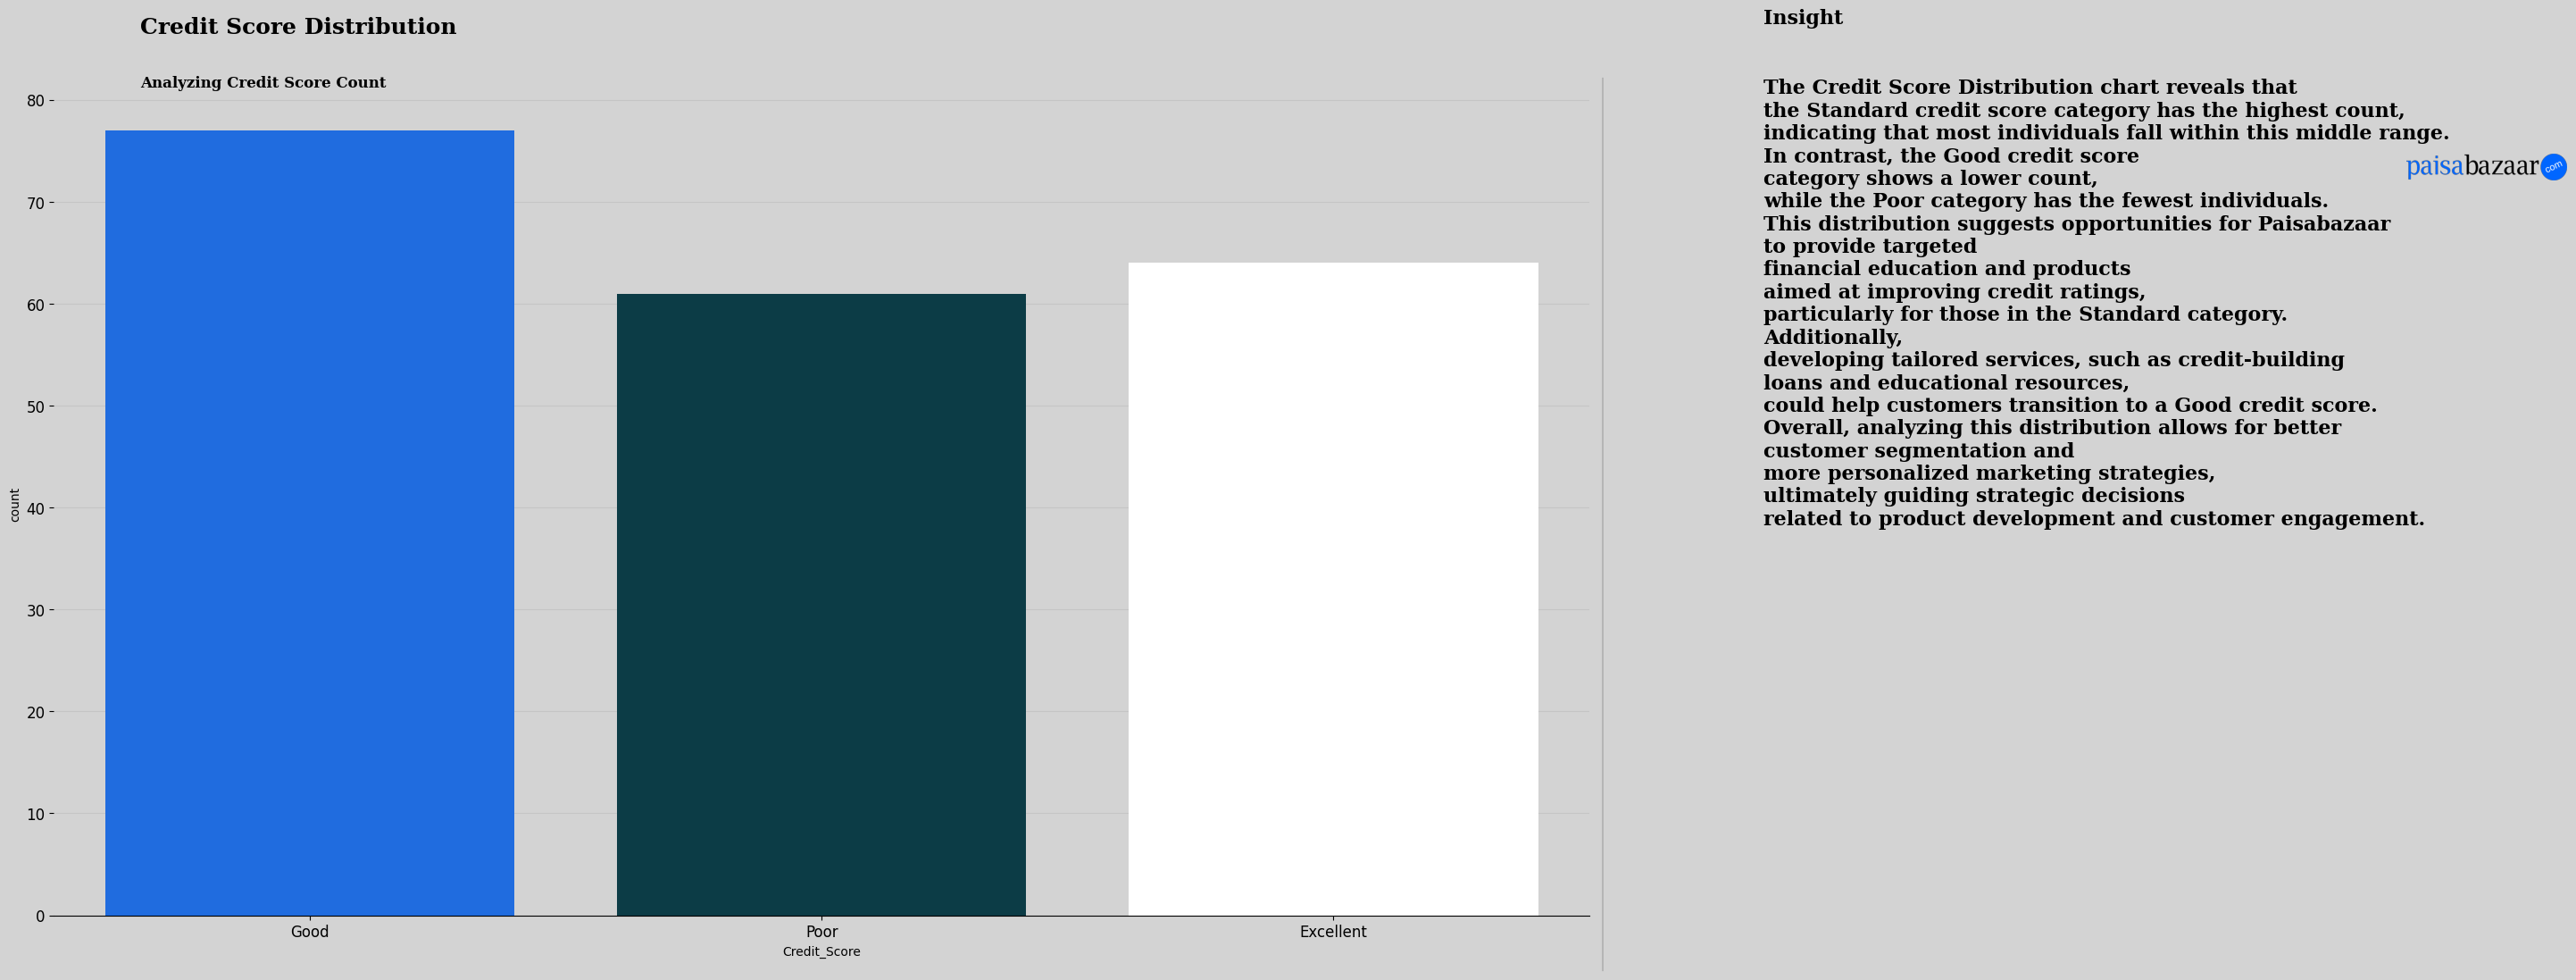

In [339]:
# Chart - 1 visualization code
fig,ax = plt.subplots(1,1,figsize = (18,10))

palette = ['#0066ff', '#024350', '#FFFFFF'] 
sns.countplot(x = 'Credit_Score', data = bank_df , palette = palette , ax = ax)

apply_chart_styling(ax = ax,fig = fig,title = 'Credit Score Distribution' , subtitle = 'Analyzing Credit Score Count',insight_text = '''

The Credit Score Distribution chart reveals that 
the Standard credit score category has the highest count, 
indicating that most individuals fall within this middle range. 
In contrast, the Good credit score 
category shows a lower count, 
while the Poor category has the fewest individuals. 
This distribution suggests opportunities for Paisabazaar 
to provide targeted 
financial education and products 
aimed at improving credit ratings, 
particularly for those in the Standard category. 
Additionally, 
developing tailored services, such as credit-building 
loans and educational resources, 
could help customers transition to a Good credit score. 
Overall, analyzing this distribution allows for better 
customer segmentation and 
more personalized marketing strategies, 
ultimately guiding strategic decisions 
related to product development and customer engagement.''')

plt.tight_layout()
plt.show()

#### Age Demographics

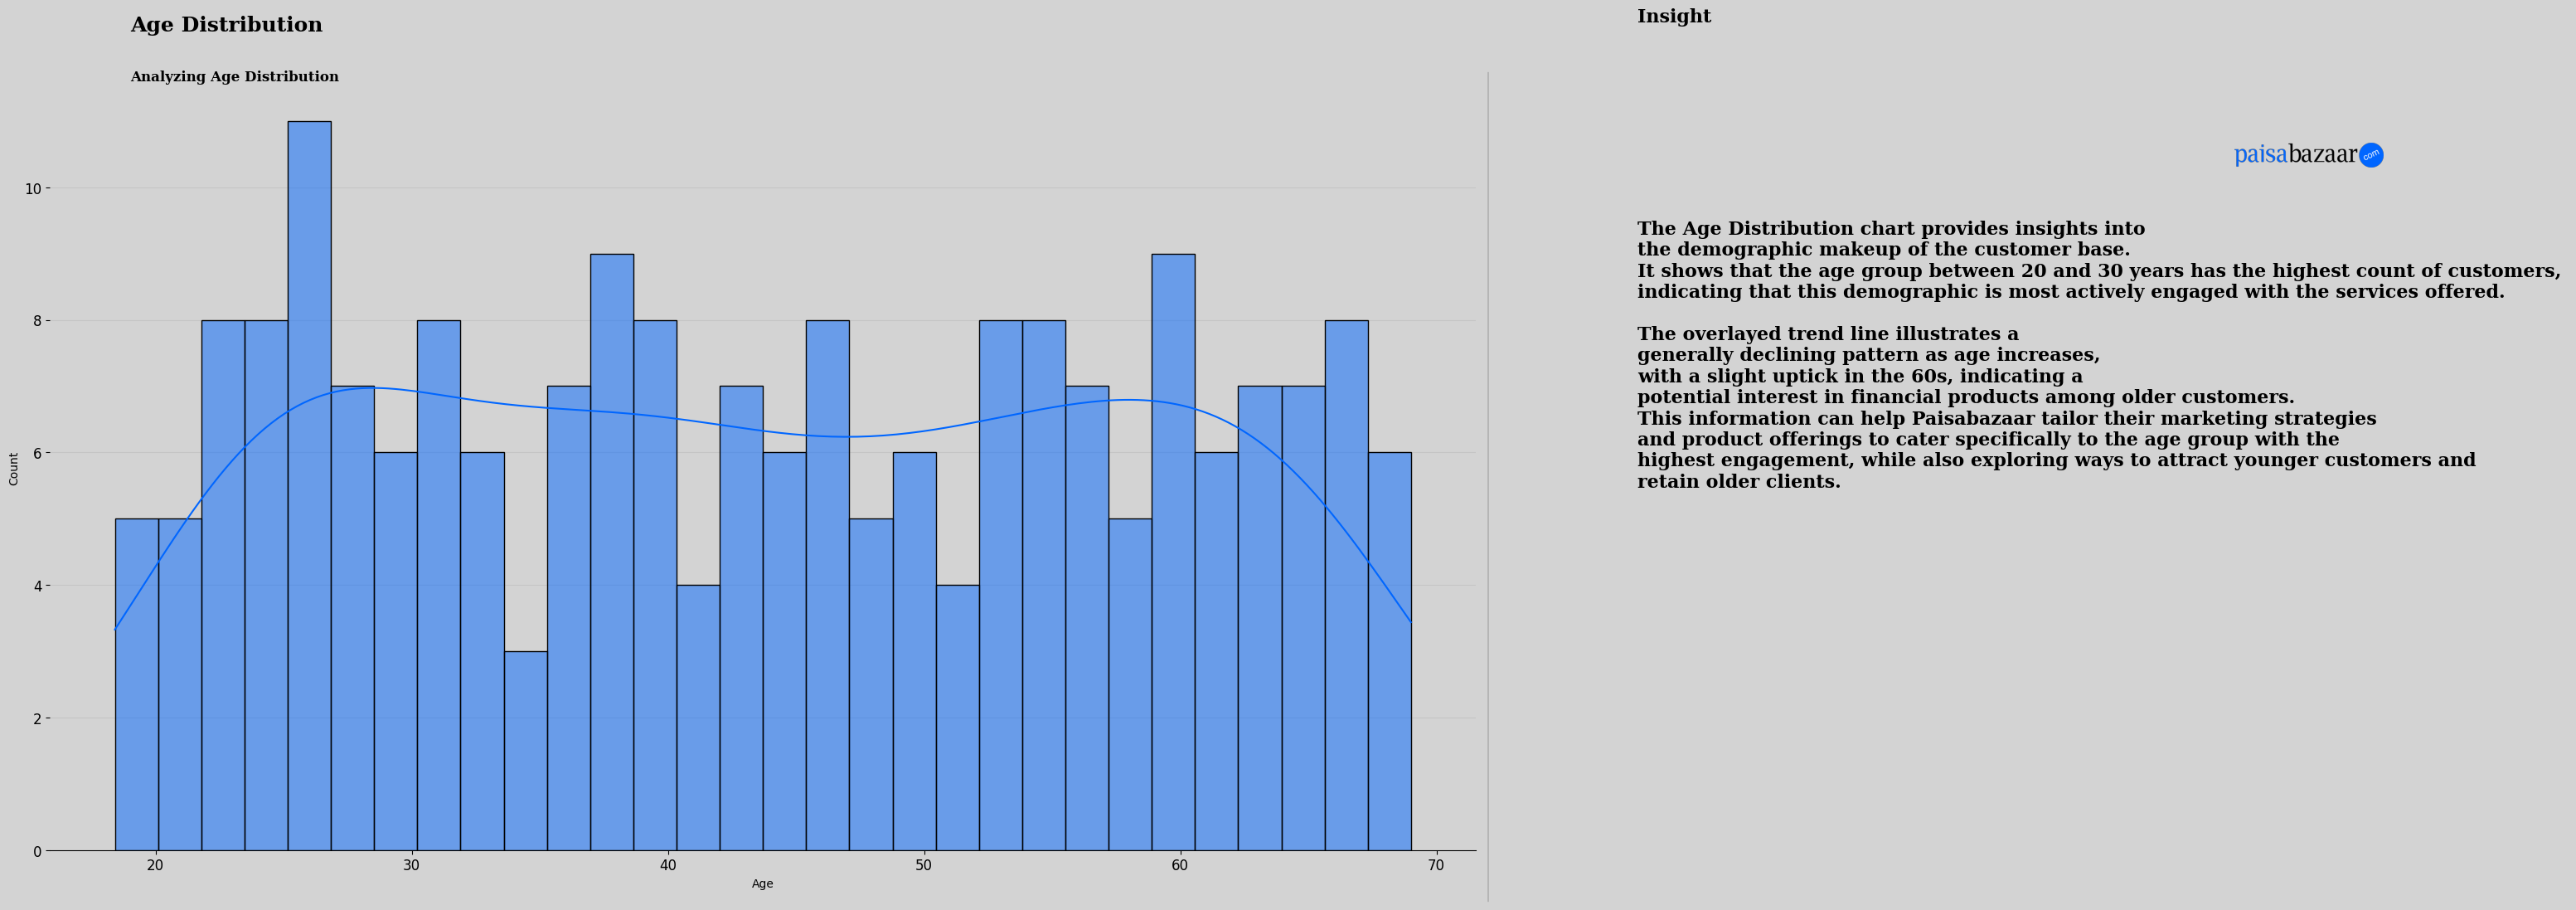

In [324]:
# Chart - 2 visualization code
fig,ax = plt.subplots(1,1,figsize = (18,10))

sns.histplot(x = 'Age' , data = bank_df , ax = ax ,kde = True, bins = 30, color = '#0066FF')
apply_chart_styling(ax = ax,fig = fig,title = 'Age Distribution' , subtitle = 'Analyzing Age Distribution',insight_text = '''
The Age Distribution chart provides insights into 
the demographic makeup of the customer base. 
It shows that the age group between 20 and 30 years has the highest count of customers, 
indicating that this demographic is most actively engaged with the services offered. 

The overlayed trend line illustrates a 
generally declining pattern as age increases, 
with a slight uptick in the 60s, indicating a 
potential interest in financial products among older customers. 
This information can help Paisabazaar tailor their marketing strategies 
and product offerings to cater specifically to the age group with the 
highest engagement, while also exploring ways to attract younger customers and 
retain older clients. ''')
plt.tight_layout()
plt.show()

#### Income Distrubution

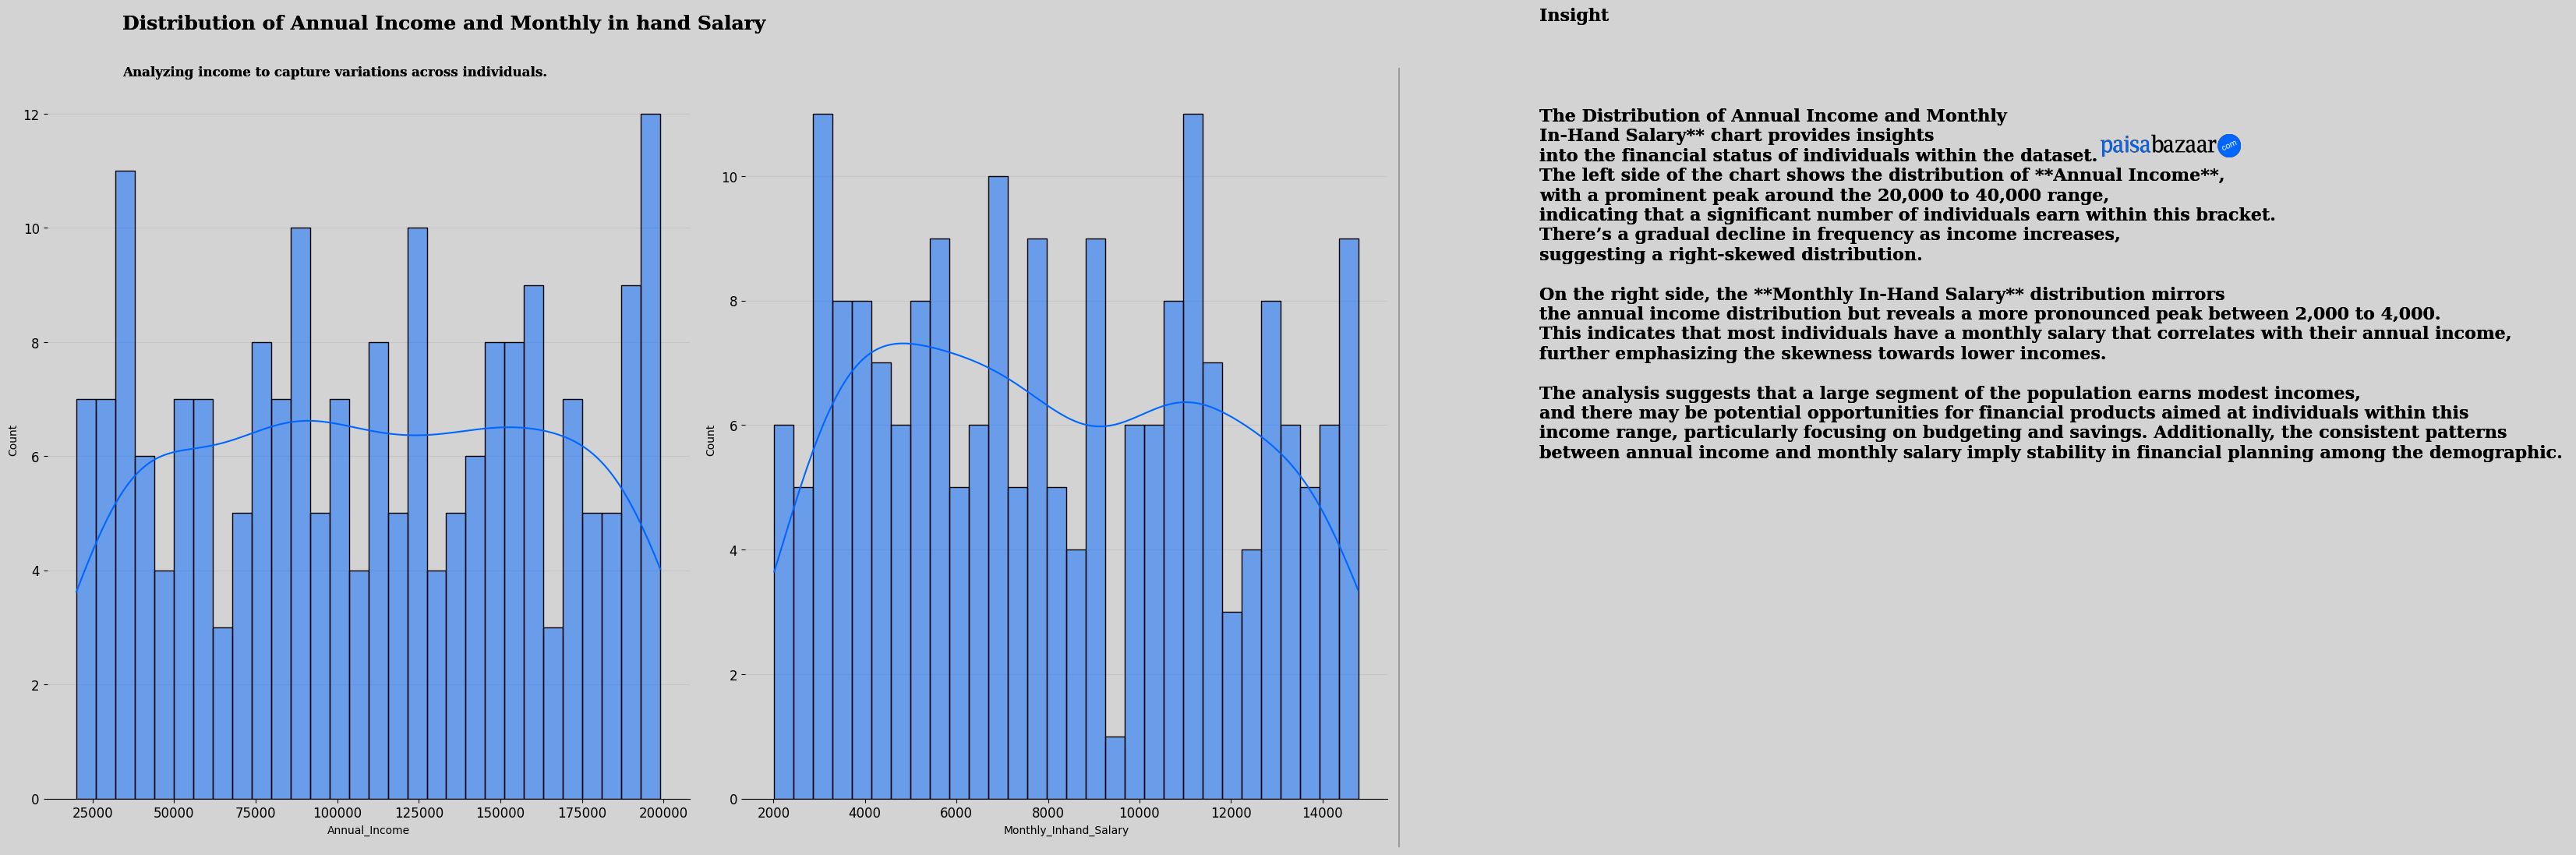

In [325]:
# Chart - 3 visualization code
fig, ax = plt.subplots(1, 2, figsize=(18, 10))

# Flatten the axes array for easier iteration
axes = ax.flatten()

variables = ['Annual_Income', 'Monthly_Inhand_Salary']

for i, var in enumerate(variables):
    sns.histplot(bank_df[var], bins=30, kde=True, ax=axes[i], color='#0066ff')
    
    apply_chart_styling(
        ax=axes[i], 
        fig=fig, 
        title=f'Distribution of Annual Income and Monthly in hand Salary ', 
        subtitle=f'Analyzing income to capture variations across individuals.', 
        insight_text='''The Distribution of Annual Income and Monthly 
In-Hand Salary** chart provides insights 
into the financial status of individuals within the dataset.
The left side of the chart shows the distribution of **Annual Income**, 
with a prominent peak around the 20,000 to 40,000 range, 
indicating that a significant number of individuals earn within this bracket. 
There’s a gradual decline in frequency as income increases, 
suggesting a right-skewed distribution.
        
On the right side, the **Monthly In-Hand Salary** distribution mirrors 
the annual income distribution but reveals a more pronounced peak between 2,000 to 4,000. 
This indicates that most individuals have a monthly salary that correlates with their annual income, 
further emphasizing the skewness towards lower incomes.
        
The analysis suggests that a large segment of the population earns modest incomes, 
and there may be potential opportunities for financial products aimed at individuals within this 
income range, particularly focusing on budgeting and savings. Additionally, the consistent patterns 
between annual income and monthly salary imply stability in financial planning among the demographic. '''
)

# Hide unused subplots if any
for j in range(len(variables), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

#### Credit Utilization

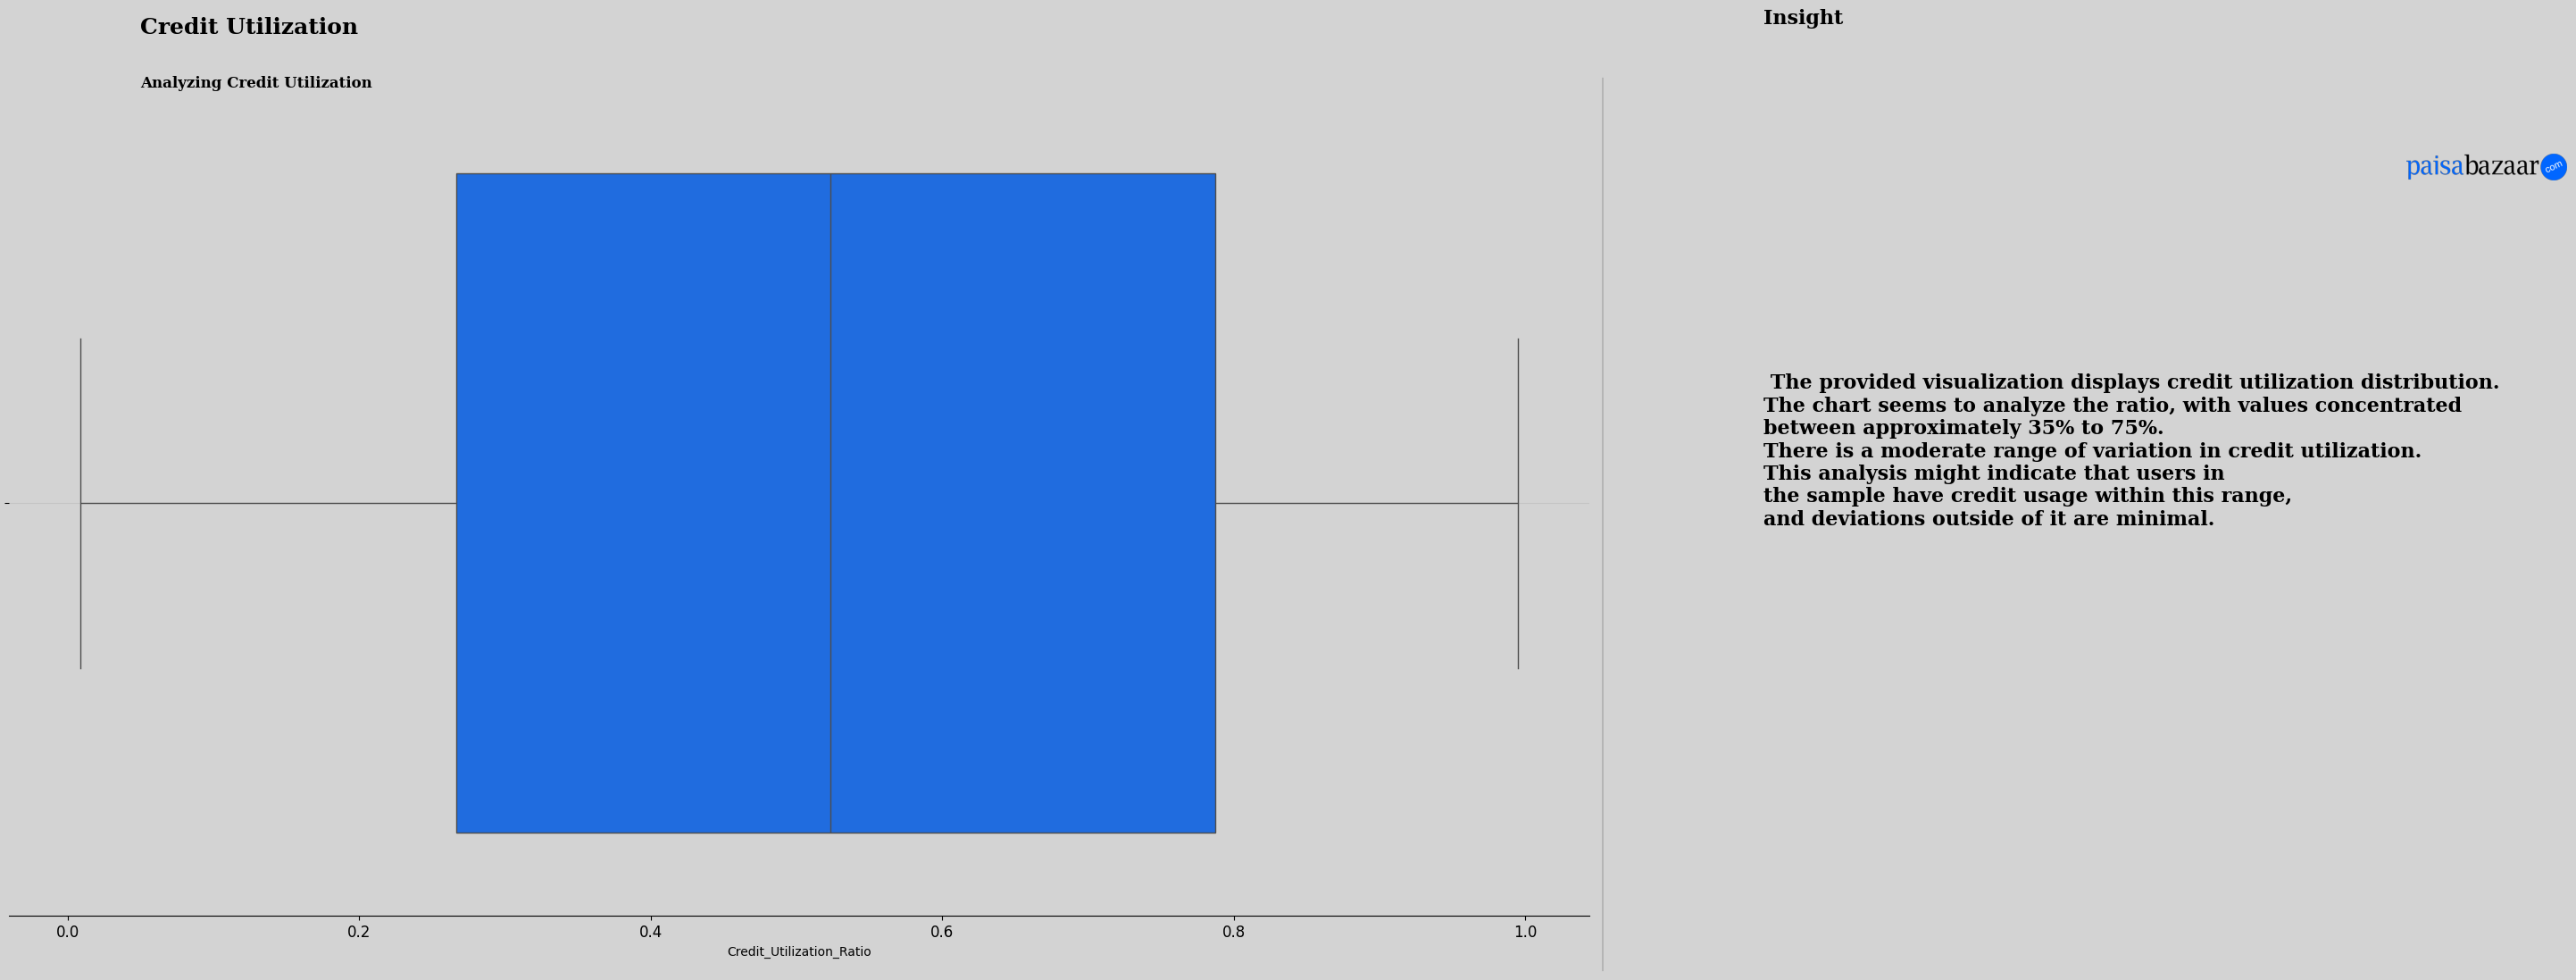

In [338]:
# Chart - 4 visualization code
fig,ax = plt.subplots(1,1,figsize = (18,10))
palette = ['#0066ff', '#024350', '#FFFFFF']
sns.boxplot(x ='Credit_Utilization_Ratio', data = bank_df , palette = palette , ax = ax)

for line in ax.artists:
    if line.get_label() == 'median':
        line.set_color('red')  

apply_chart_styling(fig = fig, ax = ax ,title = 'Credit Utilization', subtitle = 'Analyzing Credit Utilization', insight_text = ''' The provided visualization displays credit utilization distribution. 
The chart seems to analyze the ratio, with values concentrated 
between approximately 35% to 75%. 
There is a moderate range of variation in credit utilization. 
This analysis might indicate that users in 
the sample have credit usage within this range, 
and deviations outside of it are minimal.''')
plt.tight_layout()
plt.show()

#### Distribution Of Interest Rate

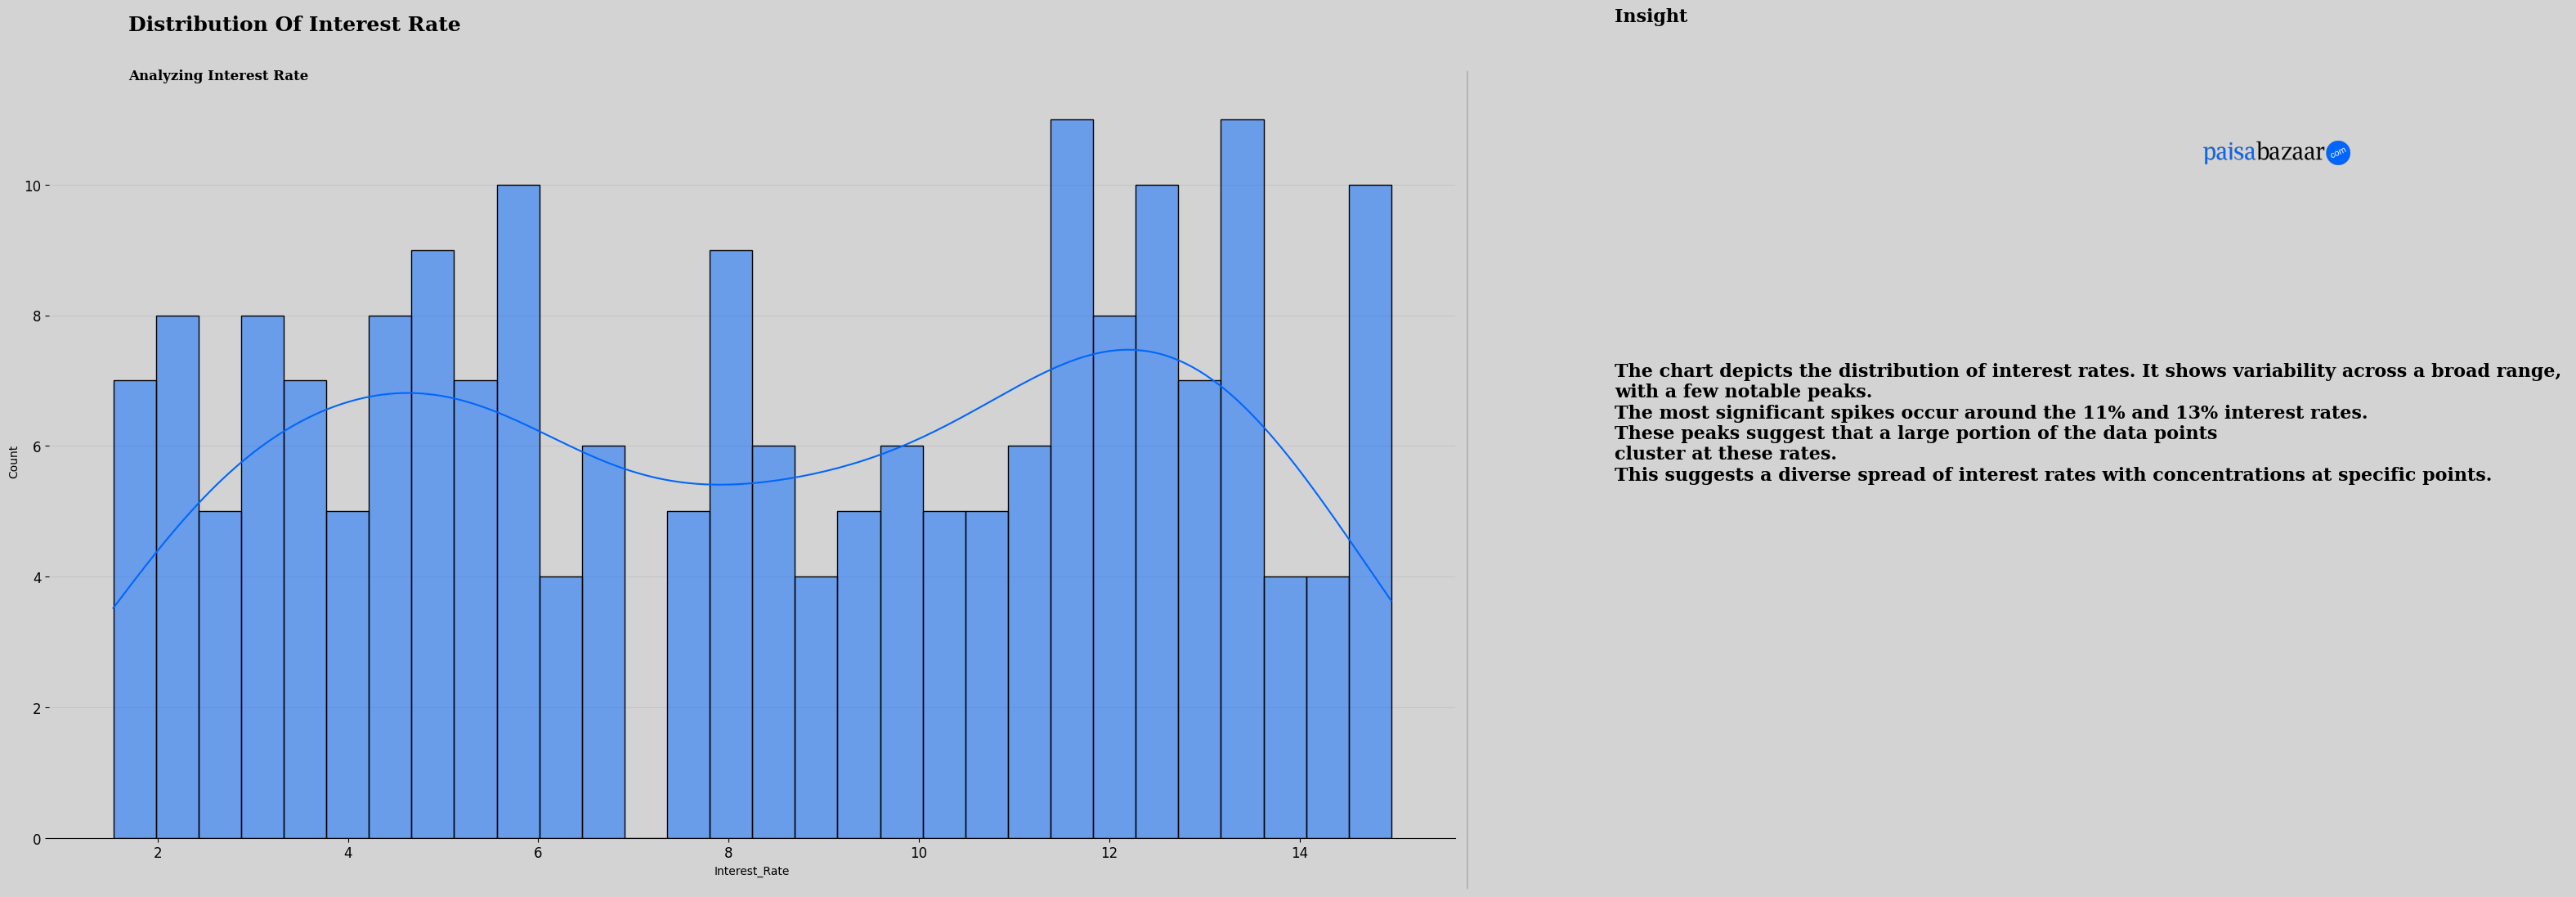

In [327]:
# Chart - 5 visualization code
fig,ax = plt.subplots(1,1,figsize = (18,10))
palette = ['#0066ff', '#024350', '#FFFFFF']
sns.histplot(x ='Interest_Rate', data = bank_df , color = '#0066FF' , ax = ax,bins = 30 ,kde =True)

apply_chart_styling(fig = fig, ax = ax ,title = 'Distribution Of Interest Rate', subtitle = 'Analyzing Interest Rate', insight_text = '''The chart depicts the distribution of interest rates. It shows variability across a broad range, 
with a few notable peaks. 
The most significant spikes occur around the 11% and 13% interest rates. 
These peaks suggest that a large portion of the data points 
cluster at these rates.
This suggests a diverse spread of interest rates with concentrations at specific points.''')
plt.tight_layout()
plt.show()

# **Bivariate Analysis**

#### Age and impact on it's Credit Score

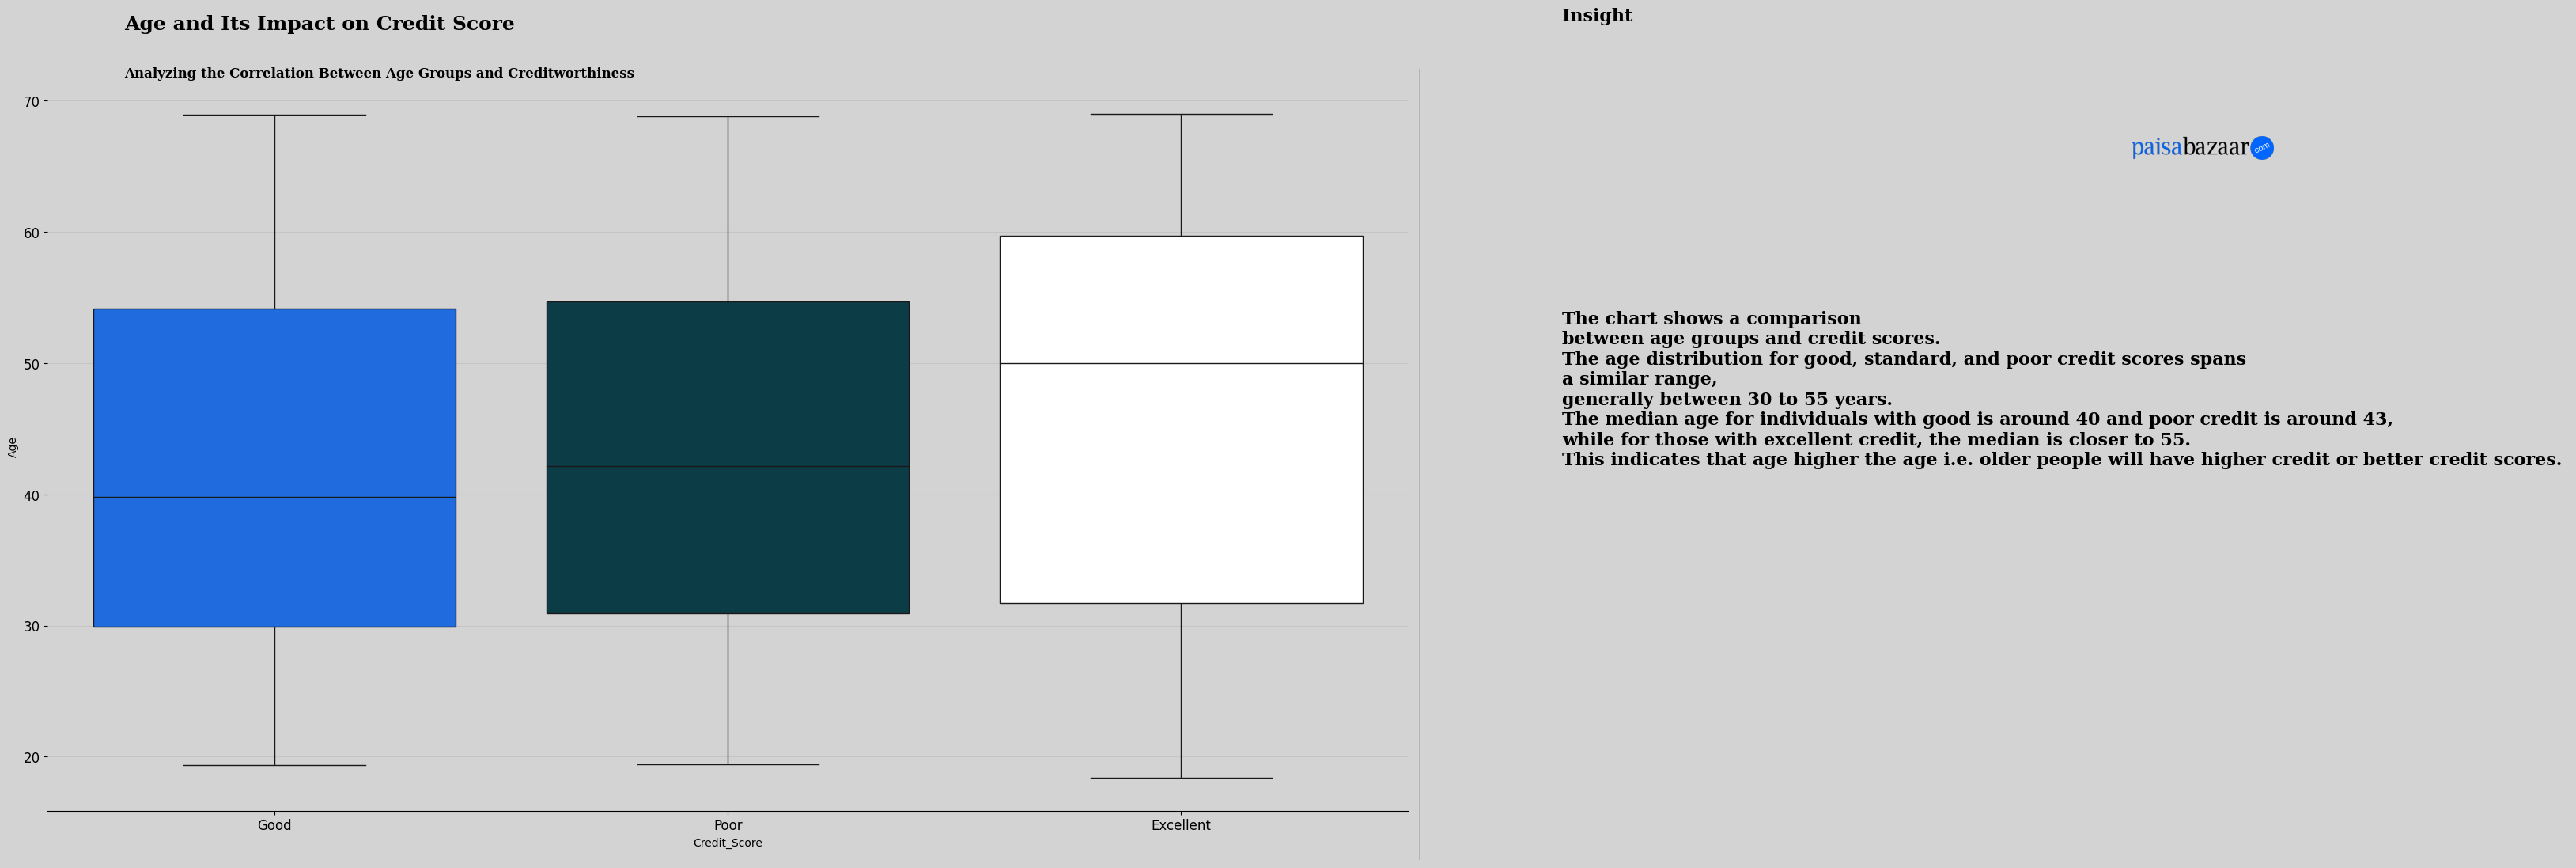

In [340]:
# Chart - 6 visualization 
fig,ax = plt.subplots(1,1,figsize = (18,10))

sns.boxplot(x = 'Credit_Score' , y = 'Age' , data = bank_df , ax = ax, palette = palette)

for line in ax.artists:
    if line.get_label() == 'median':
        line.set_color('red')  
        
apply_chart_styling(fig = fig , ax = ax , title = 'Age and Its Impact on Credit Score', subtitle = 'Analyzing the Correlation Between Age Groups and Creditworthiness', insight_text = '''The chart shows a comparison 
between age groups and credit scores. 
The age distribution for good, standard, and poor credit scores spans 
a similar range, 
generally between 30 to 55 years. 
The median age for individuals with good is around 40 and poor credit is around 43, 
while for those with excellent credit, the median is closer to 55. 
This indicates that age higher the age i.e. older people will have higher credit or better credit scores. ''')
plt.tight_layout()
plt.show()

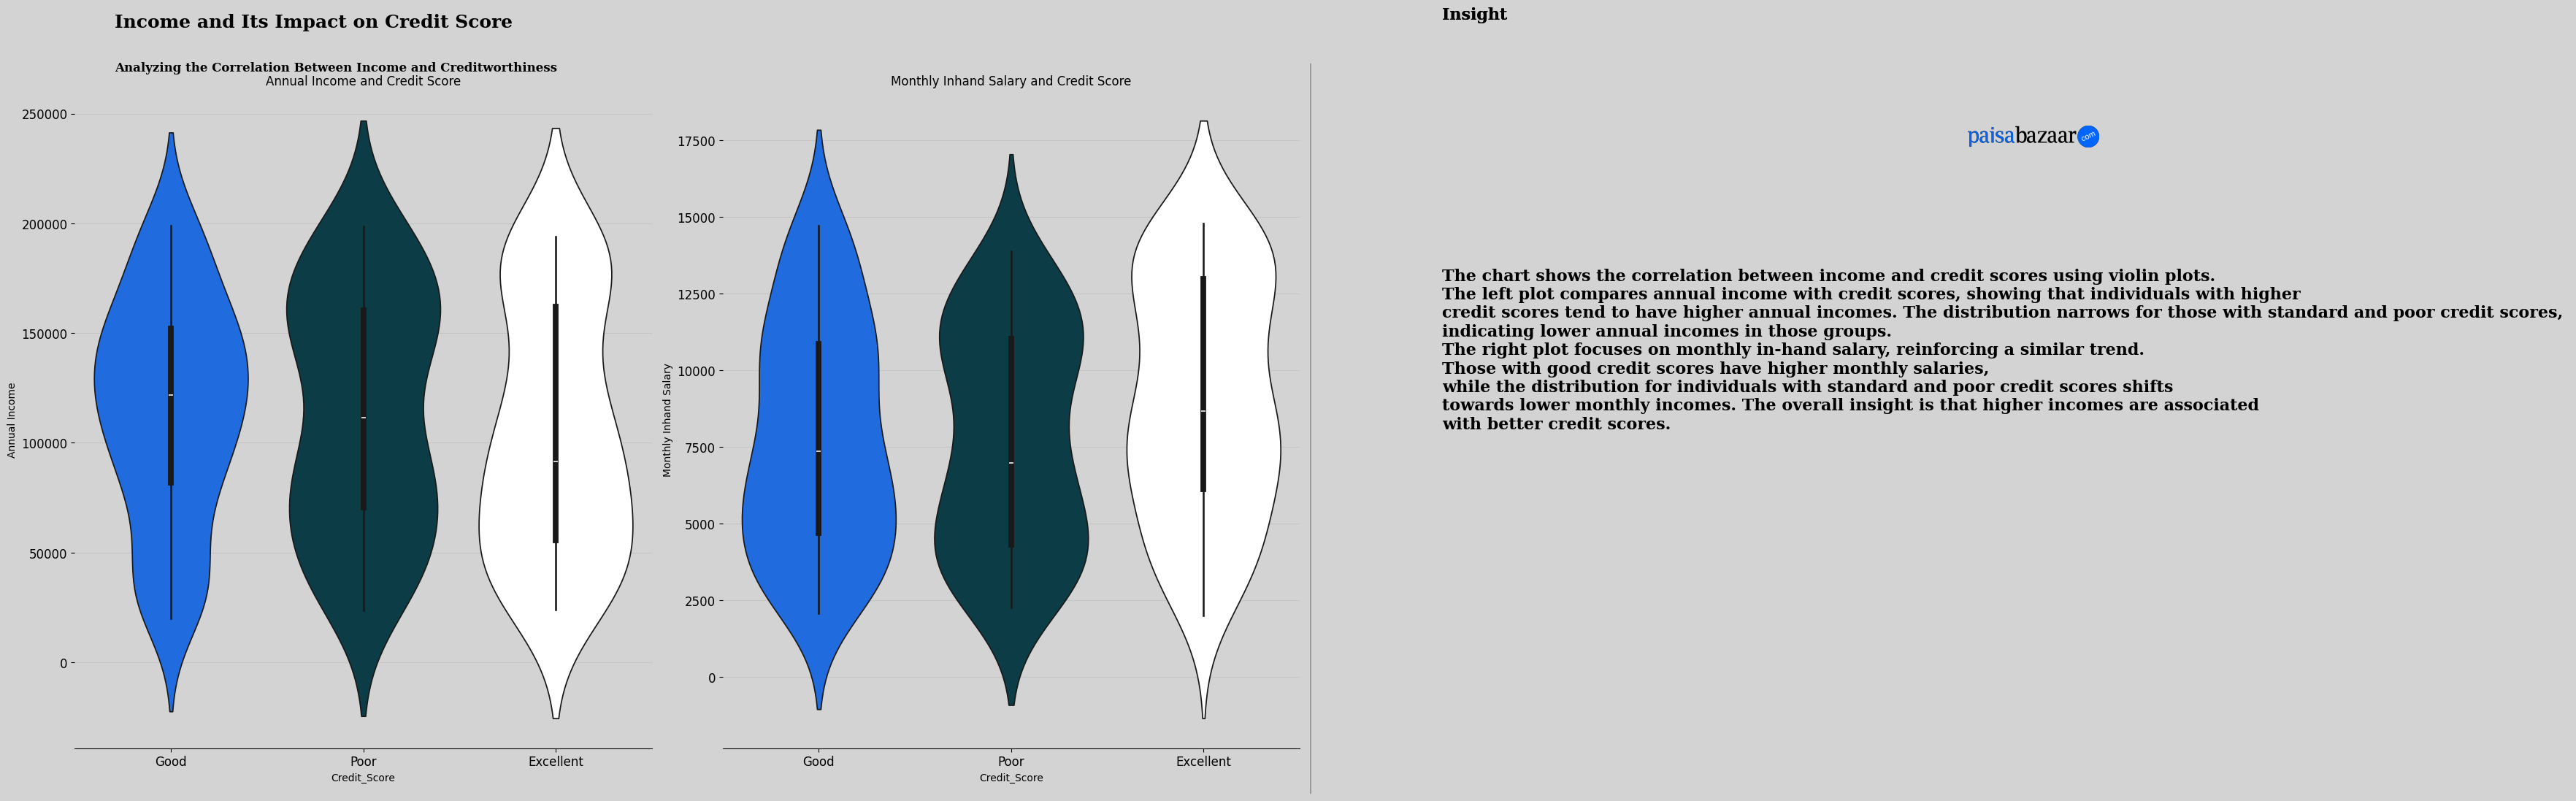

In [329]:
# Chart - 7 visualization code
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,10))


sns.violinplot(x='Credit_Score', y='Annual_Income', data=bank_df, ax=ax1, palette=palette)
ax1.set_title('Annual Income and Credit Score')
ax1.set_ylabel('Annual Income')


sns.violinplot(x='Credit_Score', y='Monthly_Inhand_Salary', data=bank_df, ax=ax2, palette=palette)
ax2.set_title('Monthly Inhand Salary and Credit Score')
ax2.set_ylabel('Monthly Inhand Salary')

apply_chart_styling(fig=fig, ax=ax1, title='Income and Its Impact on Credit Score', subtitle='Analyzing the Correlation Between Income and Creditworthiness', insight_text=''' ''')
apply_chart_styling(fig=fig, ax=ax2, title='', subtitle='', insight_text='''The chart shows the correlation between income and credit scores using violin plots. 
The left plot compares annual income with credit scores, showing that individuals with higher 
credit scores tend to have higher annual incomes. The distribution narrows for those with standard and poor credit scores, 
indicating lower annual incomes in those groups.
The right plot focuses on monthly in-hand salary, reinforcing a similar trend. 
Those with good credit scores have higher monthly salaries, 
while the distribution for individuals with standard and poor credit scores shifts 
towards lower monthly incomes. The overall insight is that higher incomes are associated 
with better credit scores. ''')
plt.tight_layout()
plt.show()

#### The Relationship Between Income and Payment Delays

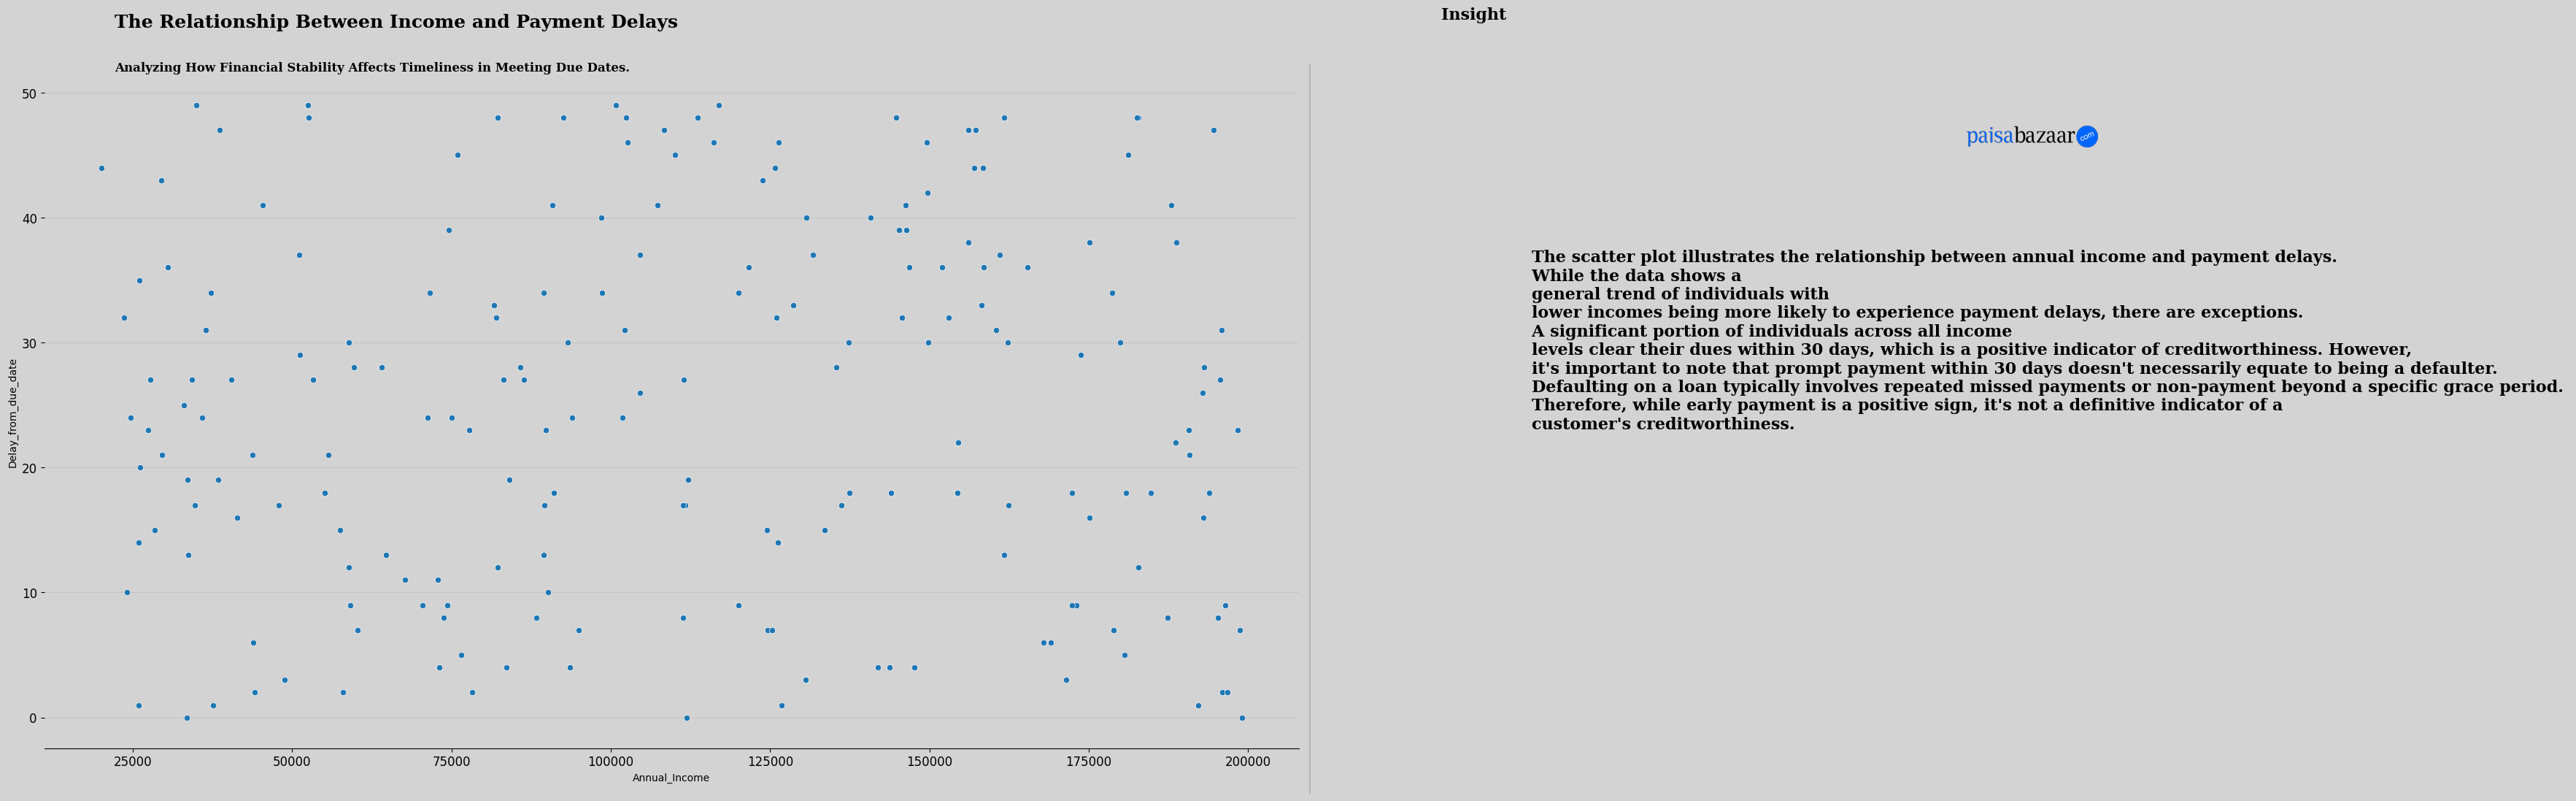

In [343]:
# Chart - 8 visualization code
fig,ax = plt.subplots(1,1,figsize = (18,10))

sns.scatterplot(x = 'Annual_Income' , y = 'Delay_from_due_date' , data = bank_df , ax = ax, palette = palette)

apply_chart_styling(fig = fig , ax = ax , title = 'The Relationship Between Income and Payment Delays', subtitle = 'Analyzing How Financial Stability Affects Timeliness in Meeting Due Dates.', 
                insight_text = ''' 
                The scatter plot illustrates the relationship between annual income and payment delays. 
                While the data shows a 
                general trend of individuals with 
                lower incomes being more likely to experience payment delays, there are exceptions. 
                A significant portion of individuals across all income 
                levels clear their dues within 30 days, which is a positive indicator of creditworthiness. However, 
                it's important to note that prompt payment within 30 days doesn't necessarily equate to being a defaulter. 
                Defaulting on a loan typically involves repeated missed payments or non-payment beyond a specific grace period. 
                Therefore, while early payment is a positive sign, it's not a definitive indicator of a 
                customer's creditworthiness. ''')
plt.tight_layout()
plt.show()

#### Understanding the Relationship Between Credit Scores and Bank Account Holdings

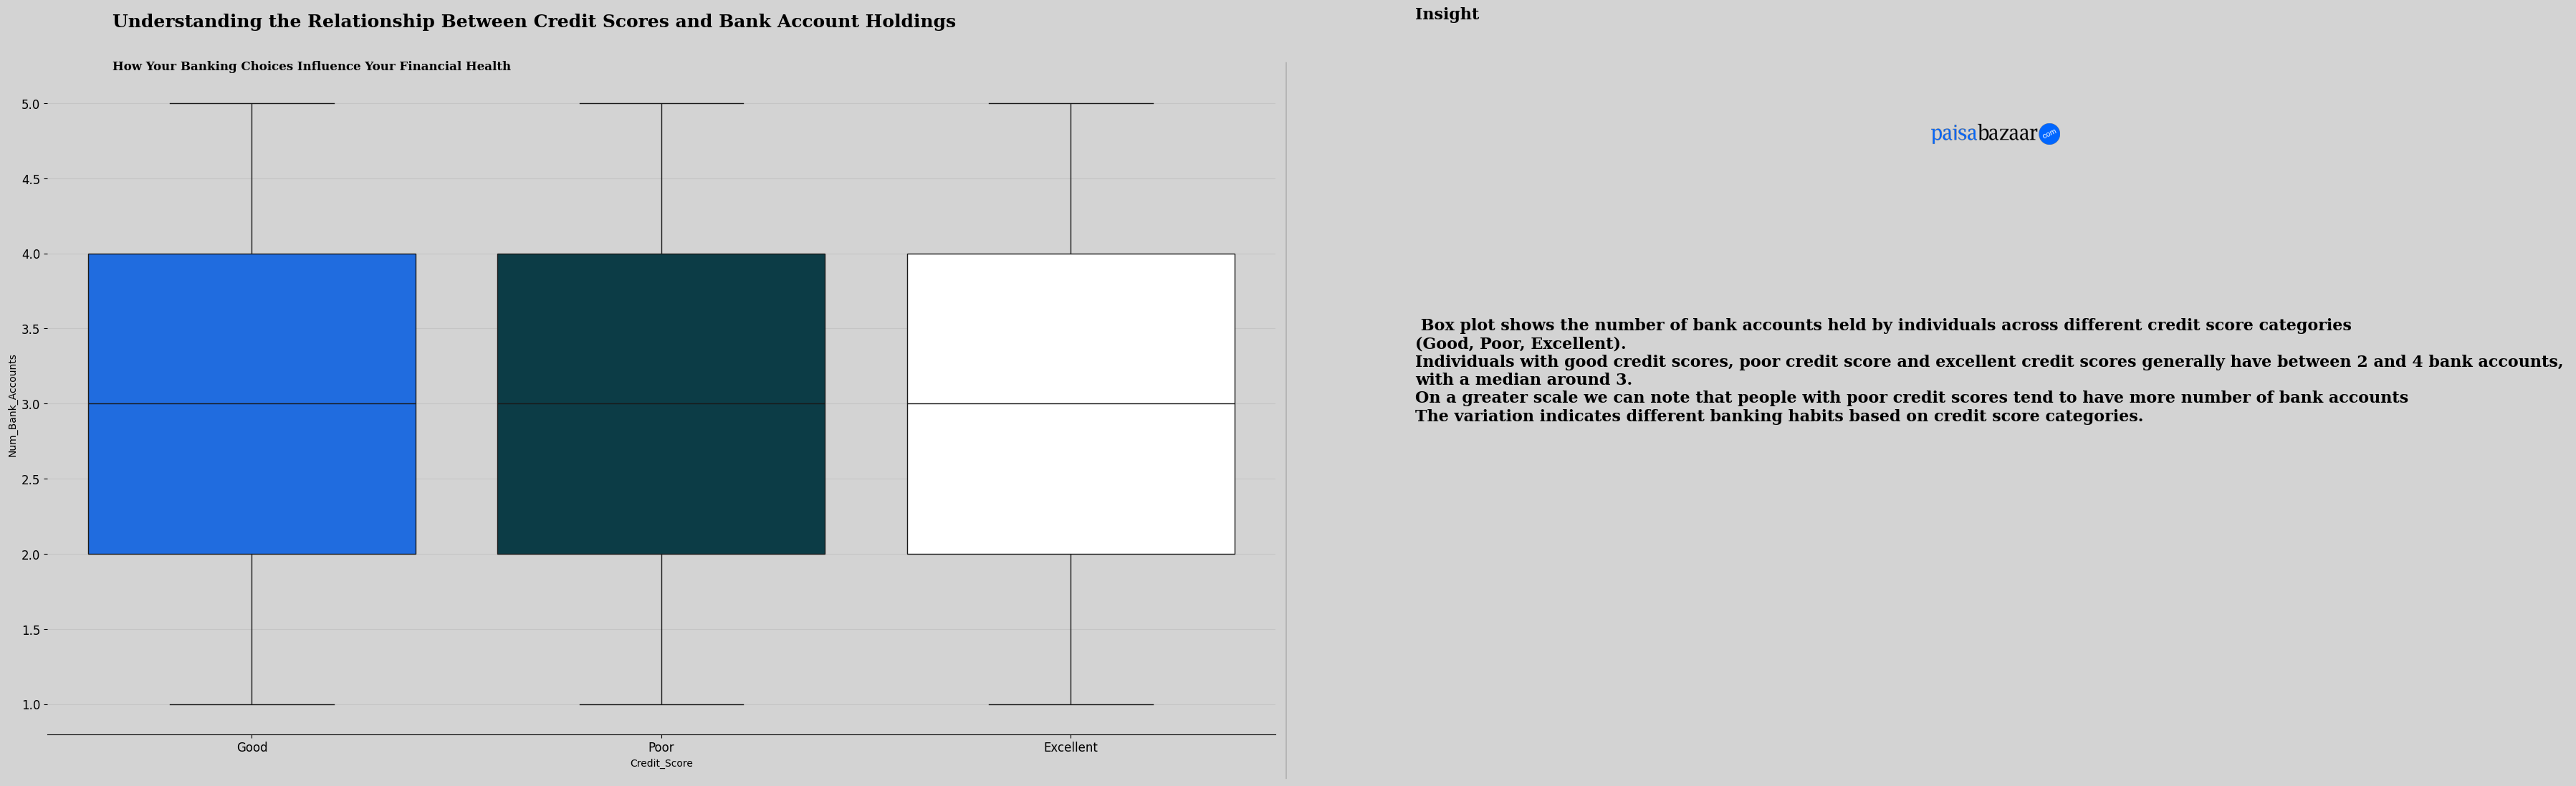

In [344]:
fig,ax = plt.subplots(1,1,figsize = (18,10))

sns.boxplot(x = 'Credit_Score' , y = 'Num_Bank_Accounts' , data = bank_df , ax = ax, palette = palette)

for line in ax.artists:
    if line.get_label() == 'median':
        line.set_color('red')  
        
apply_chart_styling(fig = fig , ax = ax , title = 'Understanding the Relationship Between Credit Scores and Bank Account Holdings', subtitle = 'How Your Banking Choices Influence Your Financial Health', insight_text = ''' Box plot shows the number of bank accounts held by individuals across different credit score categories 
(Good, Poor, Excellent).
Individuals with good credit scores, poor credit score and excellent credit scores generally have between 2 and 4 bank accounts, 
with a median around 3. 
On a greater scale we can note that people with poor credit scores tend to have more number of bank accounts
The variation indicates different banking habits based on credit score categories.''')
plt.tight_layout()
plt.show()

#### The Impact of Delayed Payments on Your Credit Score

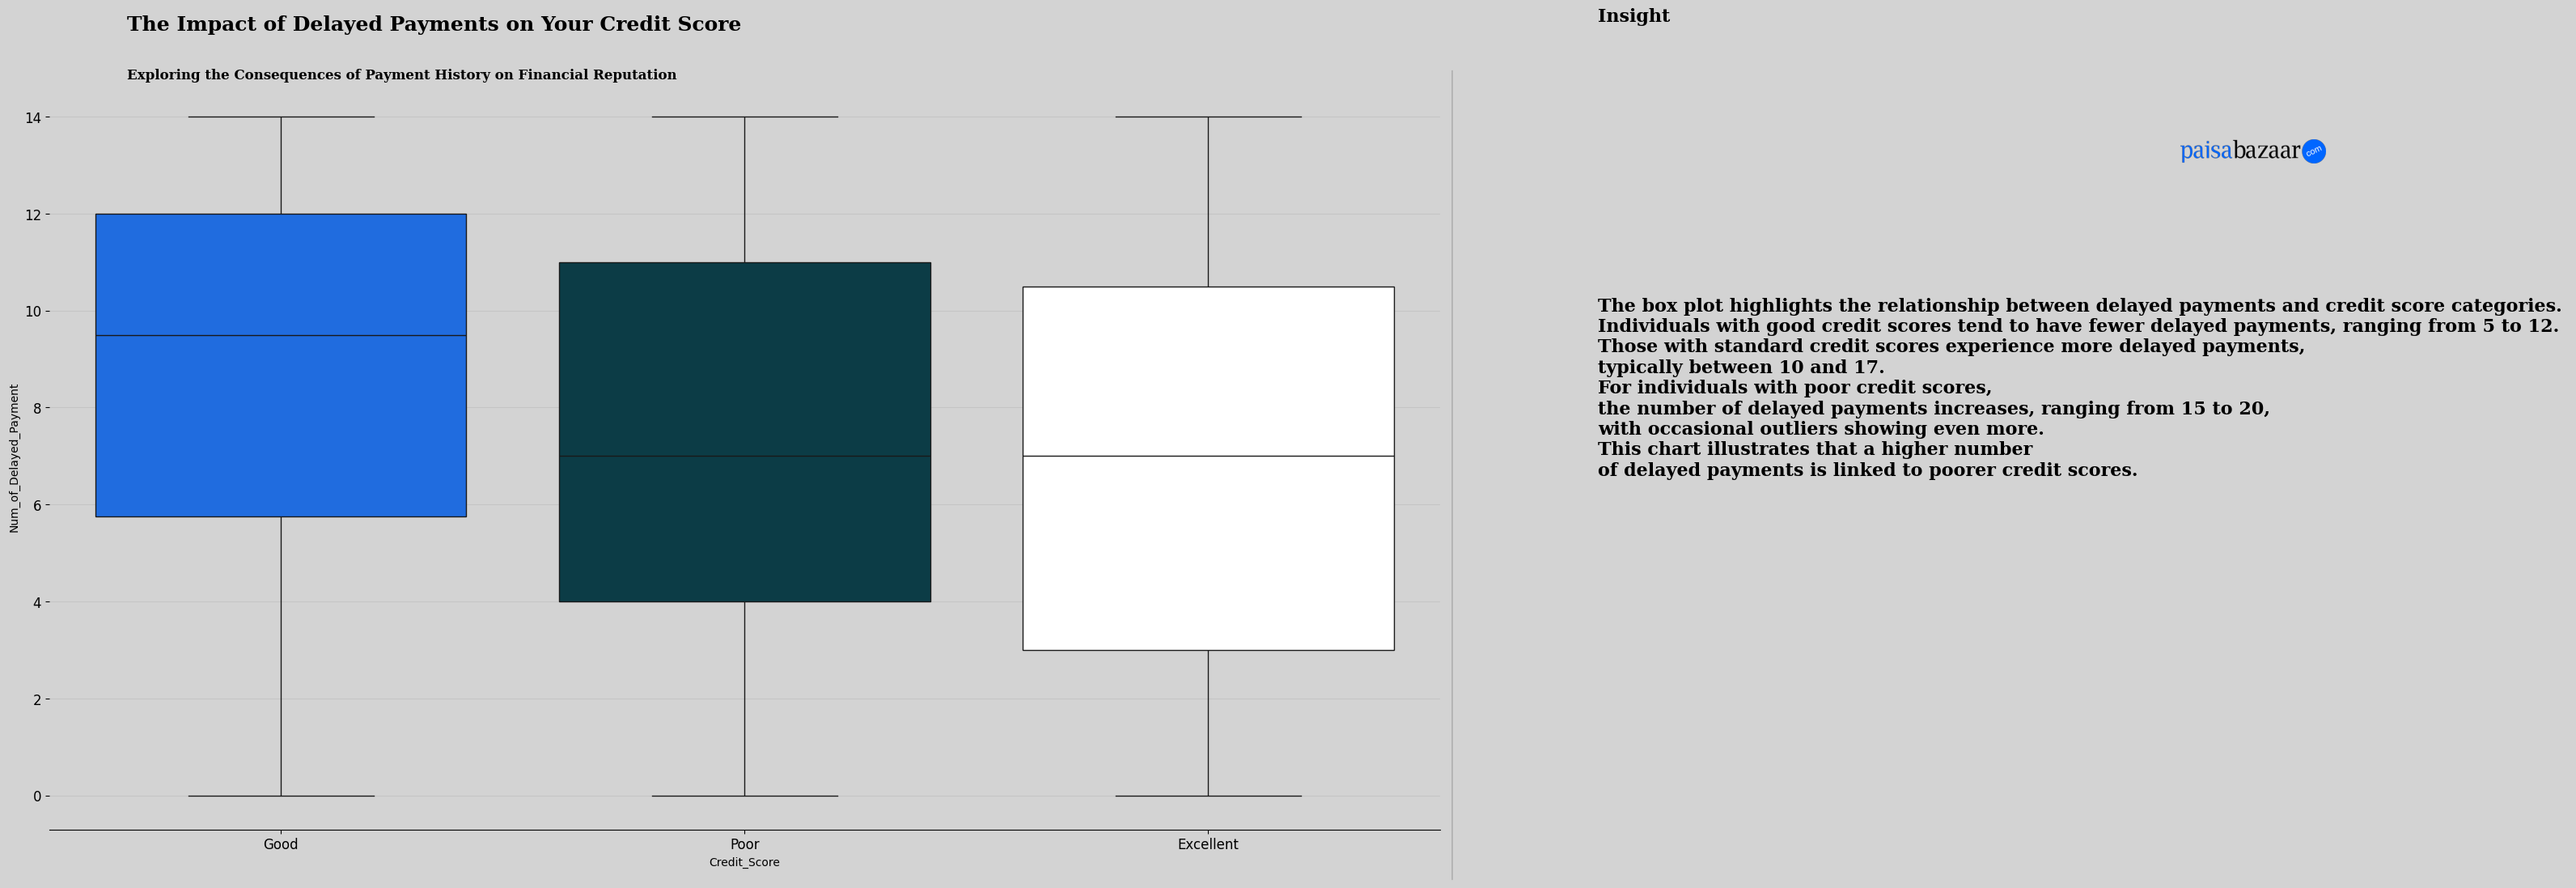

In [332]:
# Chart - 10 visualization code
fig,ax = plt.subplots(1,1,figsize = (18,10))

sns.boxplot(x = 'Credit_Score' , y = 'Num_of_Delayed_Payment' , data = bank_df , ax = ax, palette = palette)

for line in ax.artists:
    if line.get_label() == 'median':
        line.set_color('red')

apply_chart_styling(fig = fig , ax = ax , title = 'The Impact of Delayed Payments on Your Credit Score', subtitle = 'Exploring the Consequences of Payment History on Financial Reputation', insight_text = '''The box plot highlights the relationship between delayed payments and credit score categories. 
Individuals with good credit scores tend to have fewer delayed payments, ranging from 5 to 12. 
Those with standard credit scores experience more delayed payments, 
typically between 10 and 17. 
For individuals with poor credit scores, 
the number of delayed payments increases, ranging from 15 to 20, 
with occasional outliers showing even more. 
This chart illustrates that a higher number 
of delayed payments is linked to poorer credit scores. ''')
plt.tight_layout()
plt.show()

#### Occupation Distribution Across Credit Scores

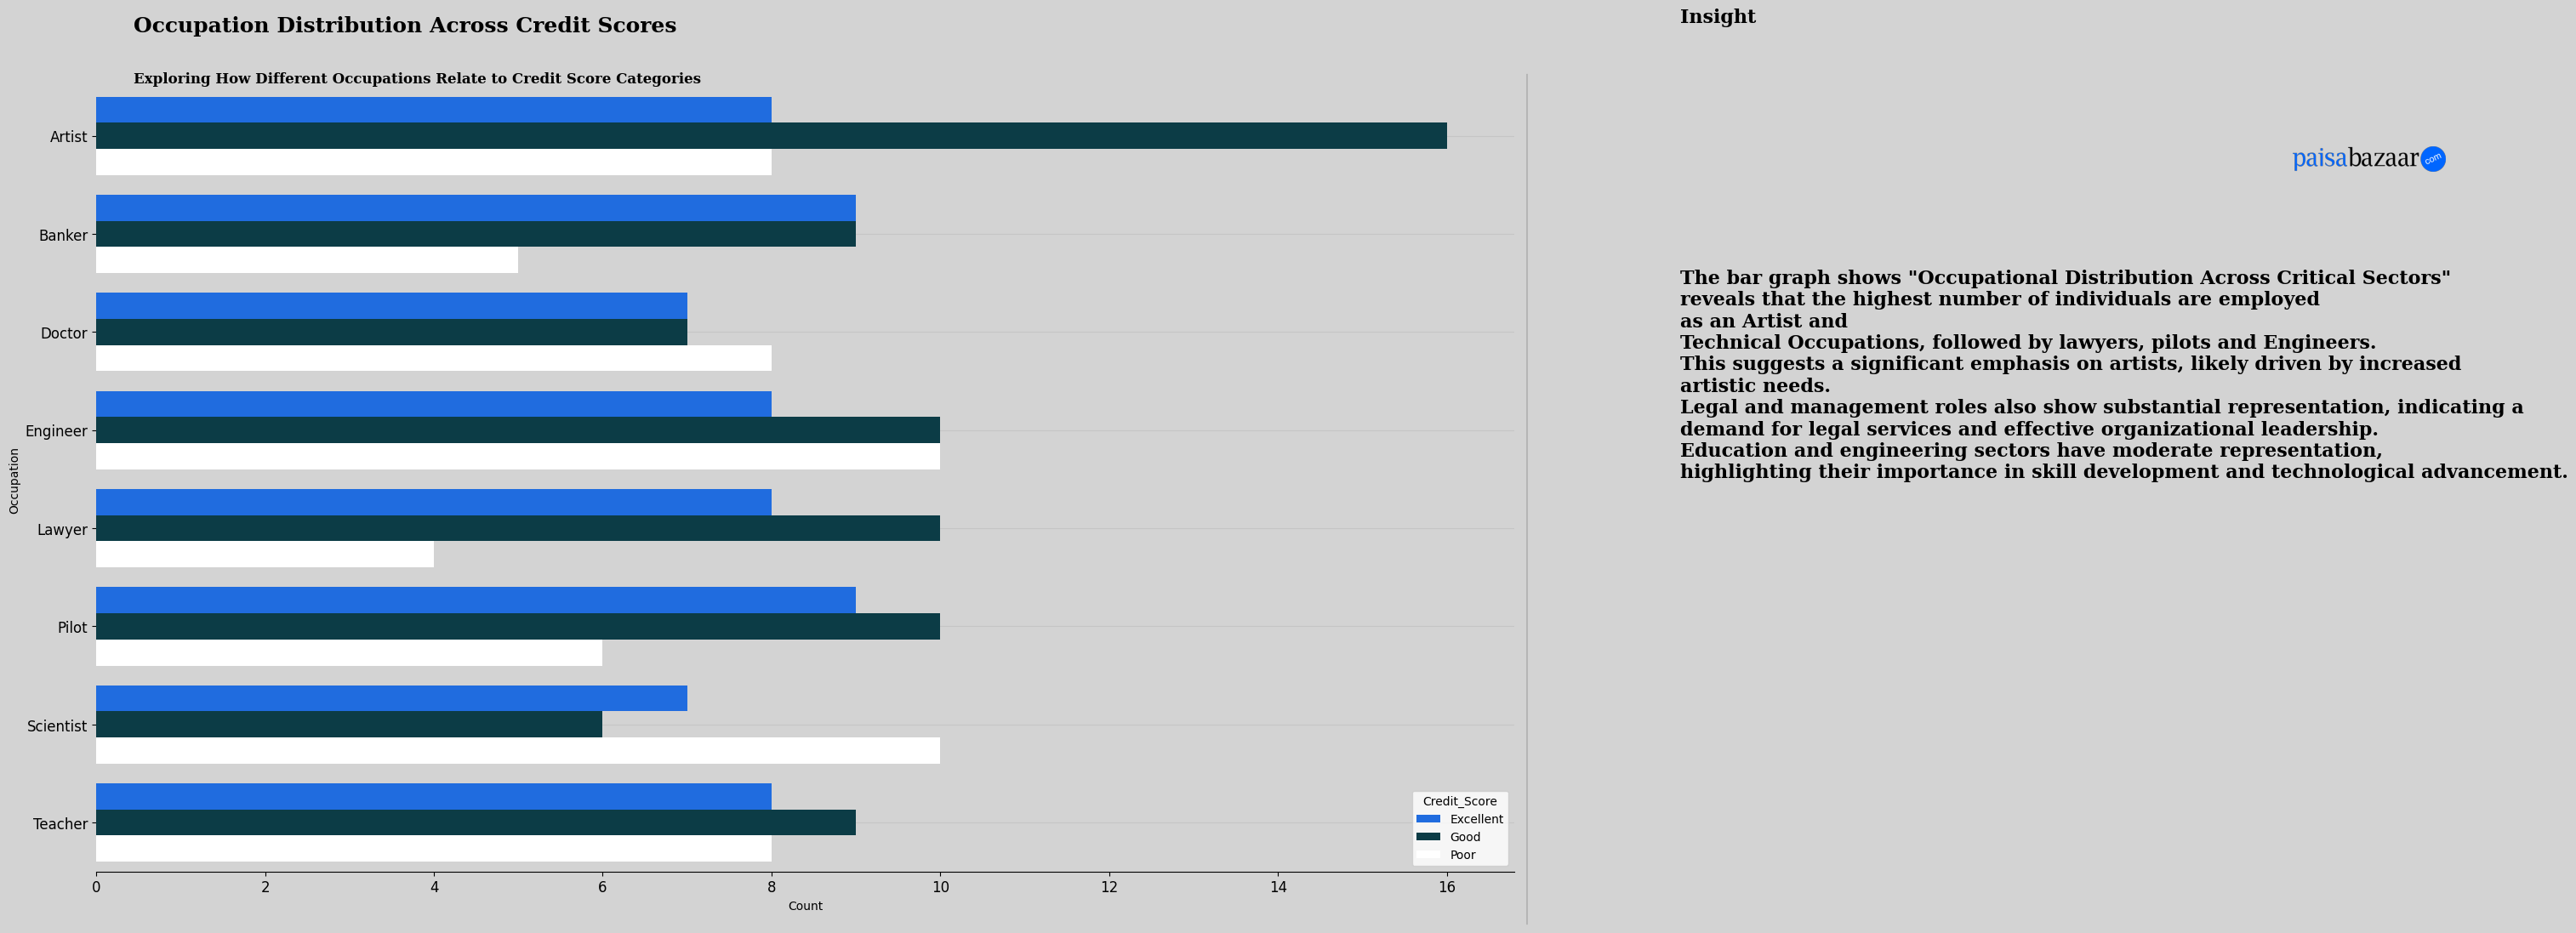

In [345]:
# Chart - 11 visualization code
credit_score_counts = bank_df.groupby(['Occupation', 'Credit_Score']).size().reset_index(name='Count')
fig,ax = plt.subplots(1,1,figsize = (18,10))

sns.barplot(x = 'Count' , y = 'Occupation' , hue = 'Credit_Score',data = credit_score_counts, ax = ax,palette = palette)
apply_chart_styling(fig = fig , ax = ax , title = 'Occupation Distribution Across Credit Scores', subtitle = 'Exploring How Different Occupations Relate to Credit Score Categories', insight_text = '''The bar graph shows "Occupational Distribution Across Critical Sectors" 
reveals that the highest number of individuals are employed 
as an Artist and 
Technical Occupations, followed by lawyers, pilots and Engineers. 
This suggests a significant emphasis on artists, likely driven by increased 
artistic needs. 
Legal and management roles also show substantial representation, indicating a 
demand for legal services and effective organizational leadership. 
Education and engineering sectors have moderate representation, 
highlighting their importance in skill development and technological advancement.
''')

plt.tight_layout()
plt.show()

#### The Relationship Between Credit Inquiries and Credit Score

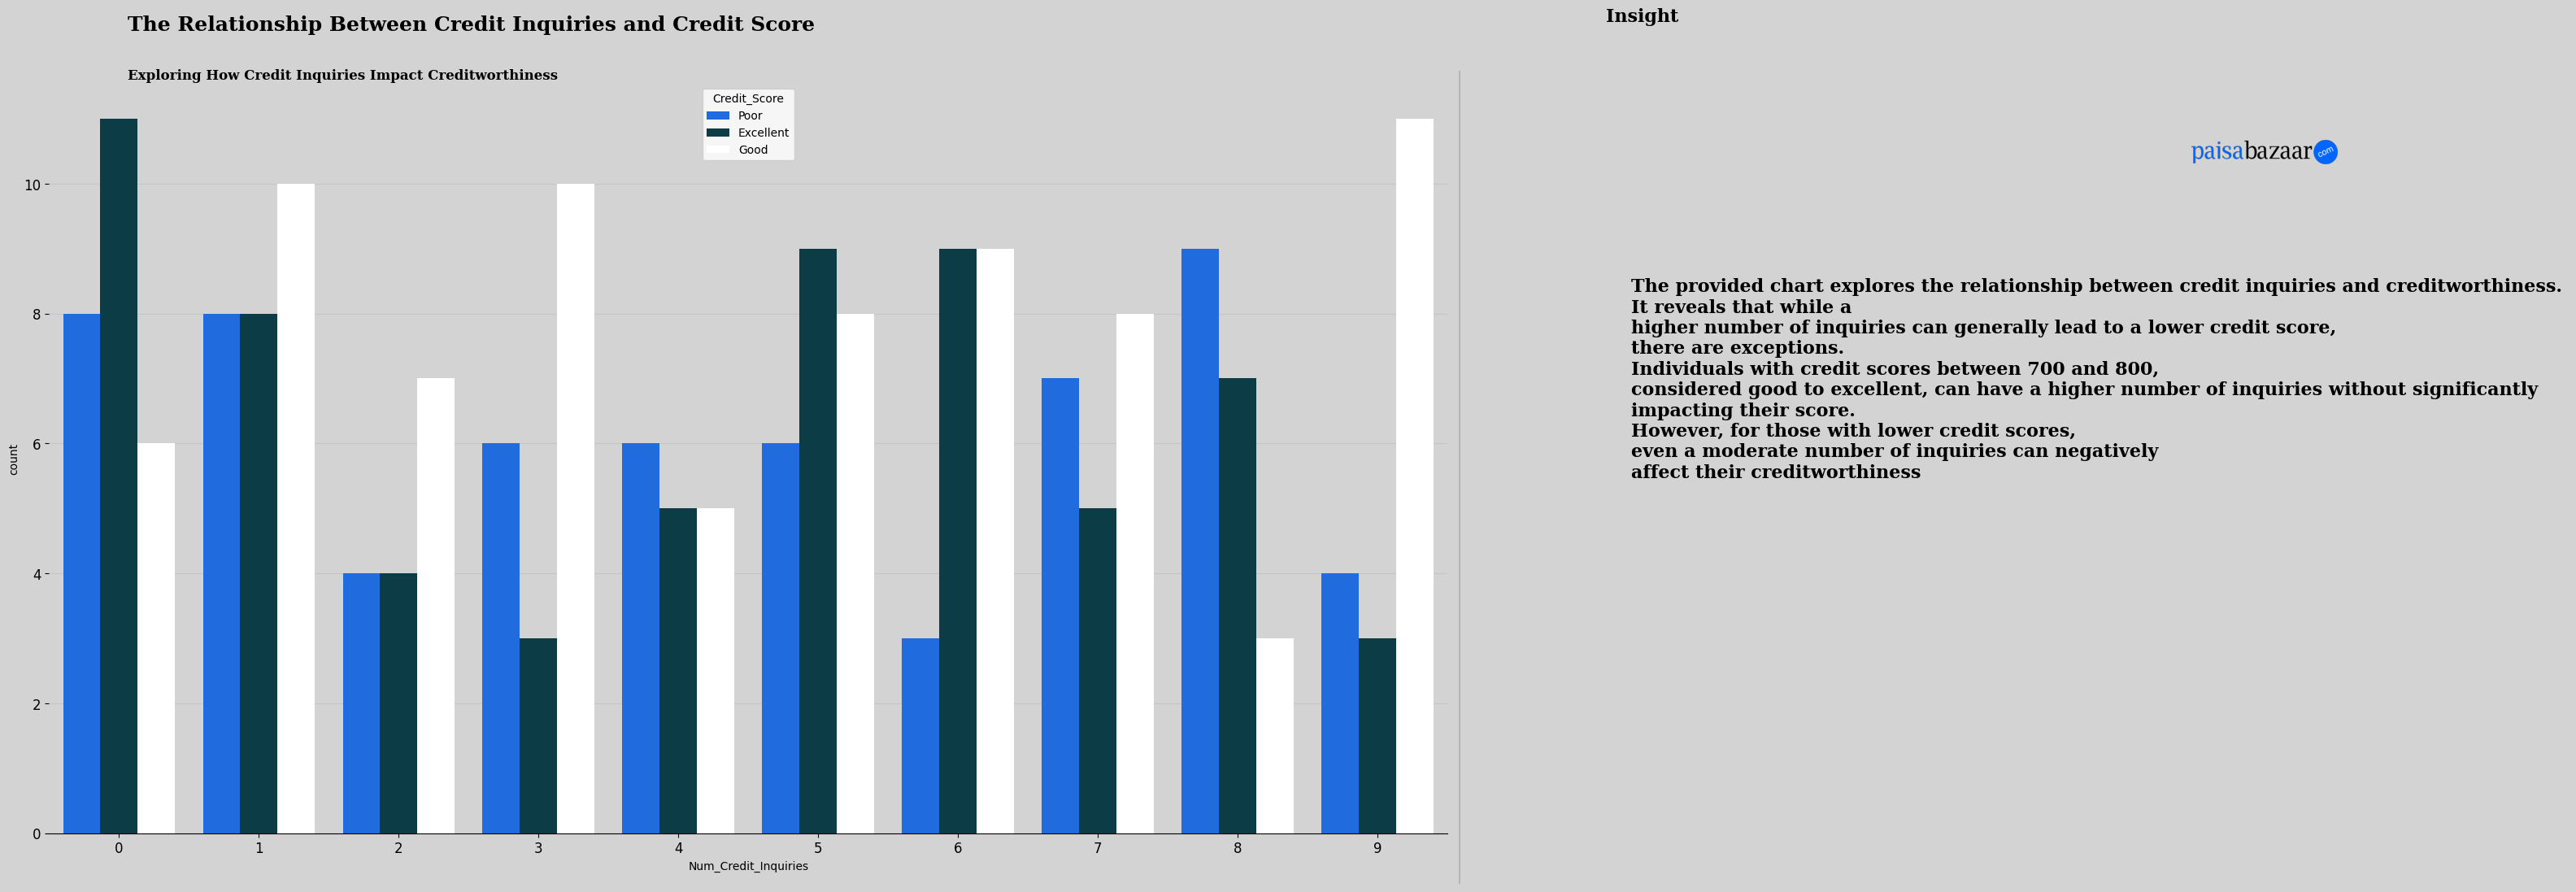

In [334]:
fig, ax = plt.subplots(1, 1, figsize=(18, 10))


sns.countplot(data=bank_df, x='Num_Credit_Inquiries', hue='Credit_Score', ax=ax, palette= palette)

# Apply chart styling
apply_chart_styling(
    fig=fig,
    ax=ax,
    title='The Relationship Between Credit Inquiries and Credit Score',
    subtitle='Exploring How Credit Inquiries Impact Creditworthiness',
    insight_text='''
    The provided chart explores the relationship between credit inquiries and creditworthiness. 
    It reveals that while a 
    higher number of inquiries can generally lead to a lower credit score, 
    there are exceptions.
    Individuals with credit scores between 700 and 800, 
    considered good to excellent, can have a higher number of inquiries without significantly 
    impacting their score. 
    However, for those with lower credit scores, 
    even a moderate number of inquiries can negatively 
    affect their creditworthiness'''
)

plt.tight_layout()
plt.show()

# **Multivariate Analysis**

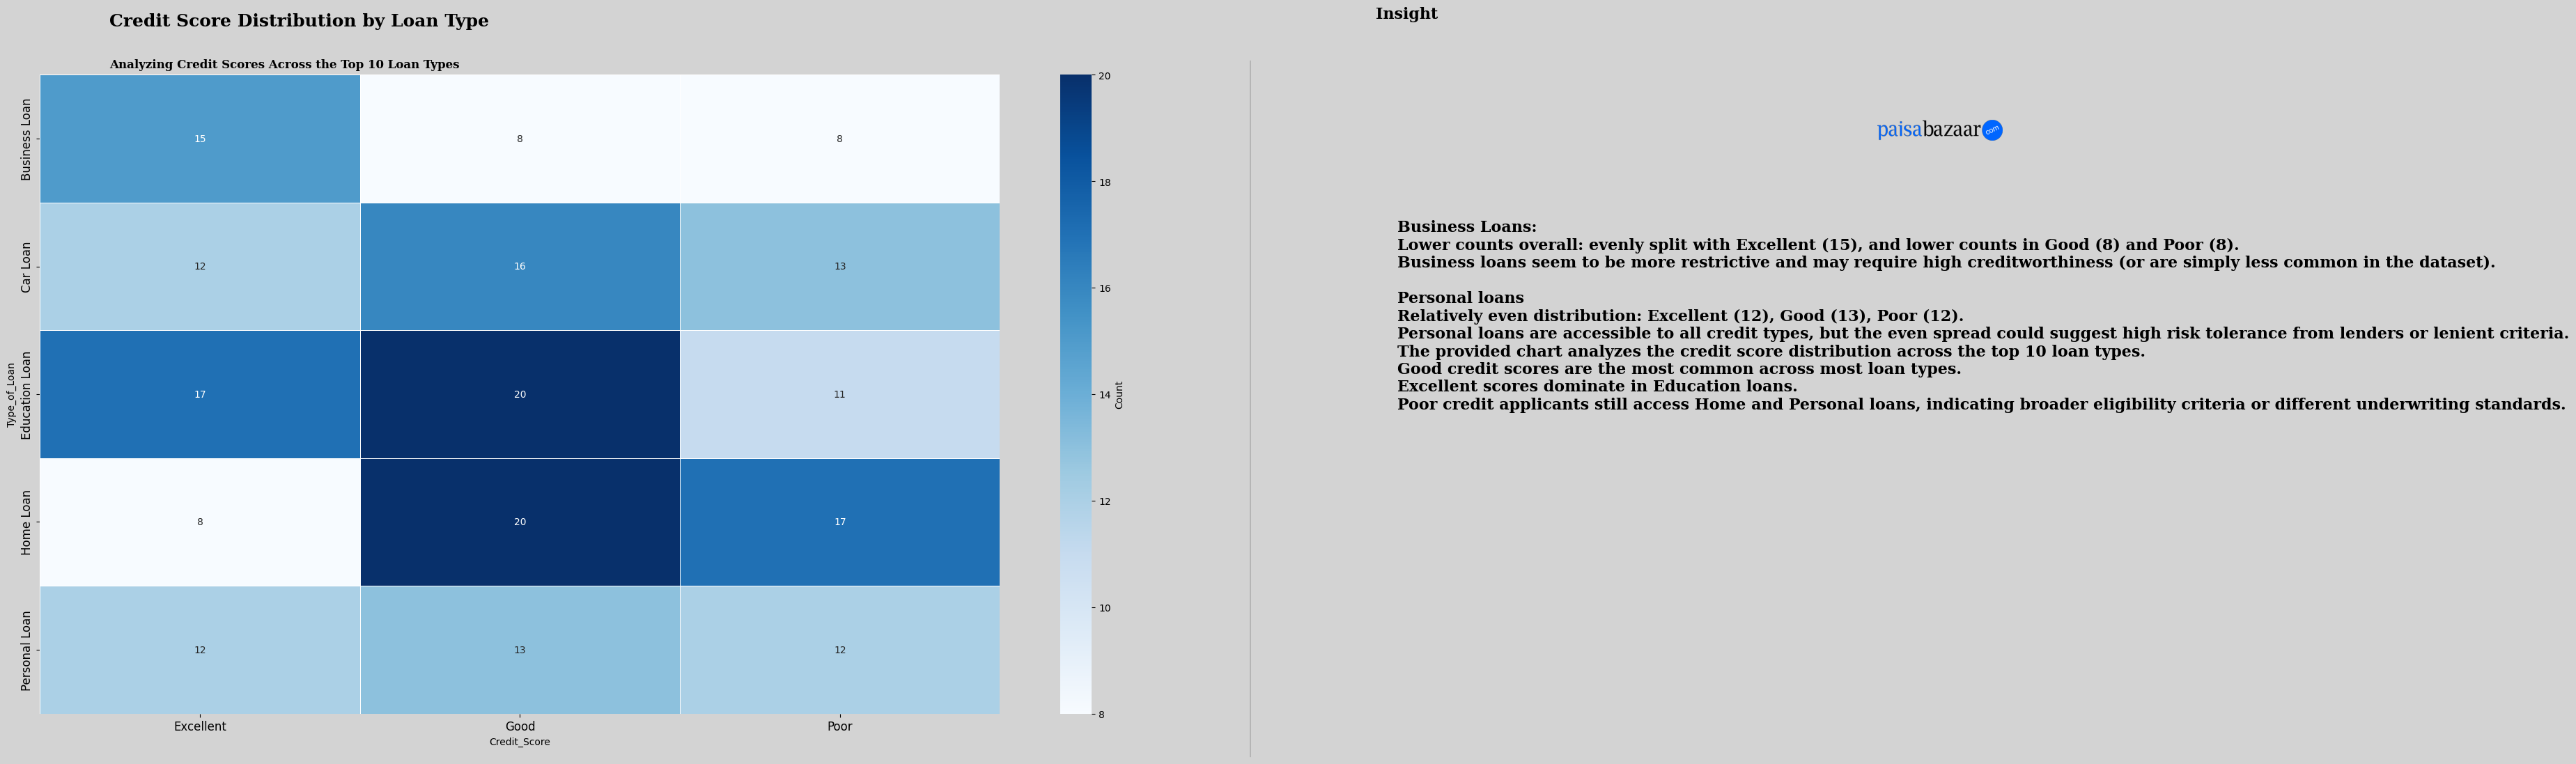

In [347]:

top_loan_types = bank_df['Type_of_Loan'].value_counts().nlargest(10).index

filtered_bank_df = bank_df[bank_df['Type_of_Loan'].isin(top_loan_types)]


loan_credit_heatmap = filtered_bank_df.groupby(['Type_of_Loan', 'Credit_Score']).size().unstack(fill_value=0)


fig, ax = plt.subplots(1, 1, figsize=(18, 10))


sns.heatmap(loan_credit_heatmap, annot=True, fmt='d', cmap='Blues', ax=ax, cbar_kws={'label': 'Count'}, linewidths=0.5)


apply_chart_styling(
    fig=fig,
    ax=ax,
    title='Credit Score Distribution by Loan Type',
    subtitle='Analyzing Credit Scores Across the Top 10 Loan Types',
    insight_text='''
    Business Loans:
    Lower counts overall: evenly split with Excellent (15), and lower counts in Good (8) and Poor (8).
    Business loans seem to be more restrictive and may require high creditworthiness (or are simply less common in the dataset).

    Personal loans
    Relatively even distribution: Excellent (12), Good (13), Poor (12).
    Personal loans are accessible to all credit types, but the even spread could suggest high risk tolerance from lenders or lenient criteria.
    The provided chart analyzes the credit score distribution across the top 10 loan types. 
    Good credit scores are the most common across most loan types.
    Excellent scores dominate in Education loans.
    Poor credit applicants still access Home and Personal loans, indicating broader eligibility criteria or different underwriting standards.'''
)

plt.tight_layout()
plt.show()

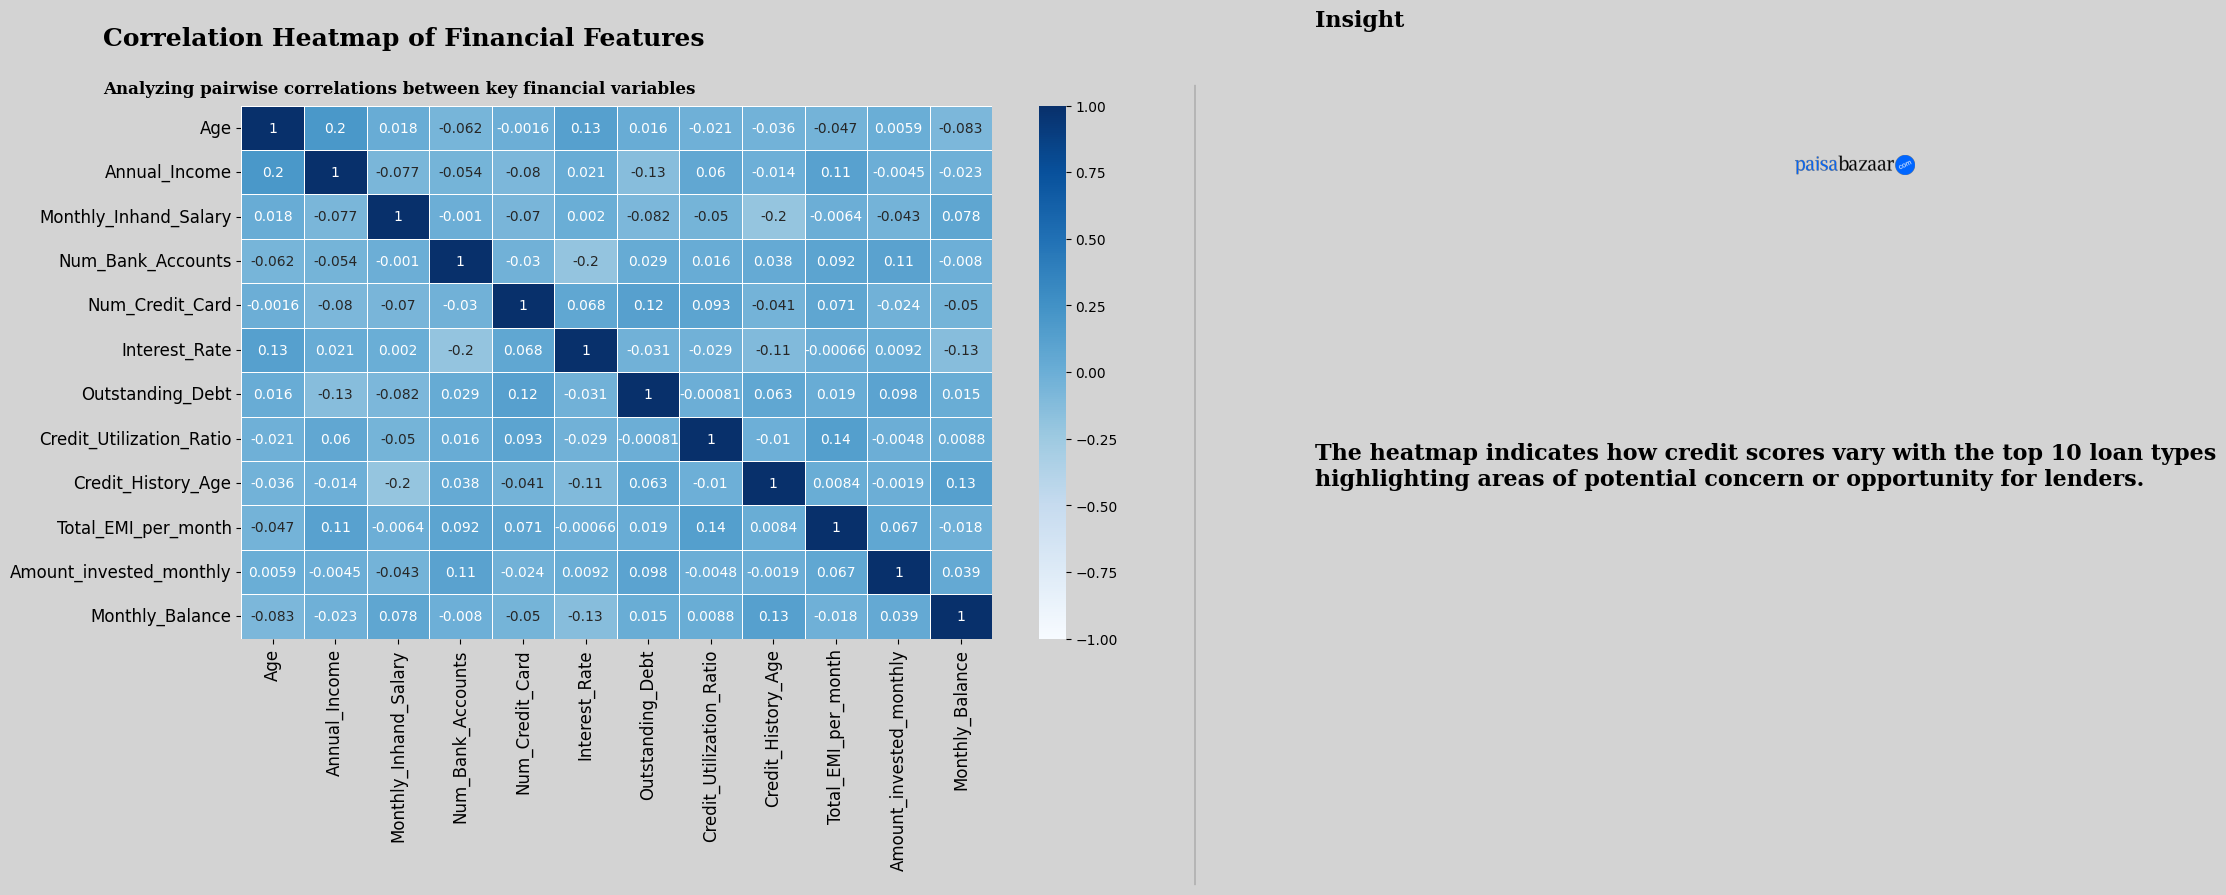

In [336]:
# Correlation Heatmap visualization code
corr_data = bank_df[['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 
                     'Num_Credit_Card', 'Interest_Rate', 'Outstanding_Debt', 
                     'Credit_Utilization_Ratio', 'Credit_History_Age', 
                     'Total_EMI_per_month', 'Amount_invested_monthly', 
                     'Monthly_Balance']]

fig,ax = plt.subplots(1,1,figsize = (12,8))
corr_matrix = corr_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1, linewidths=0.5, ax=ax, annot_kws={"size": 10})

apply_chart_styling(
    fig=fig,
    ax=ax,
    title='Correlation Heatmap of Financial Features',
    subtitle='Analyzing pairwise correlations between key financial variables',
    insight_text='''The heatmap indicates how credit scores vary with the top 10 loan types
highlighting areas of potential concern or opportunity for lenders.'''
)

plt.tight_layout()
plt.show()

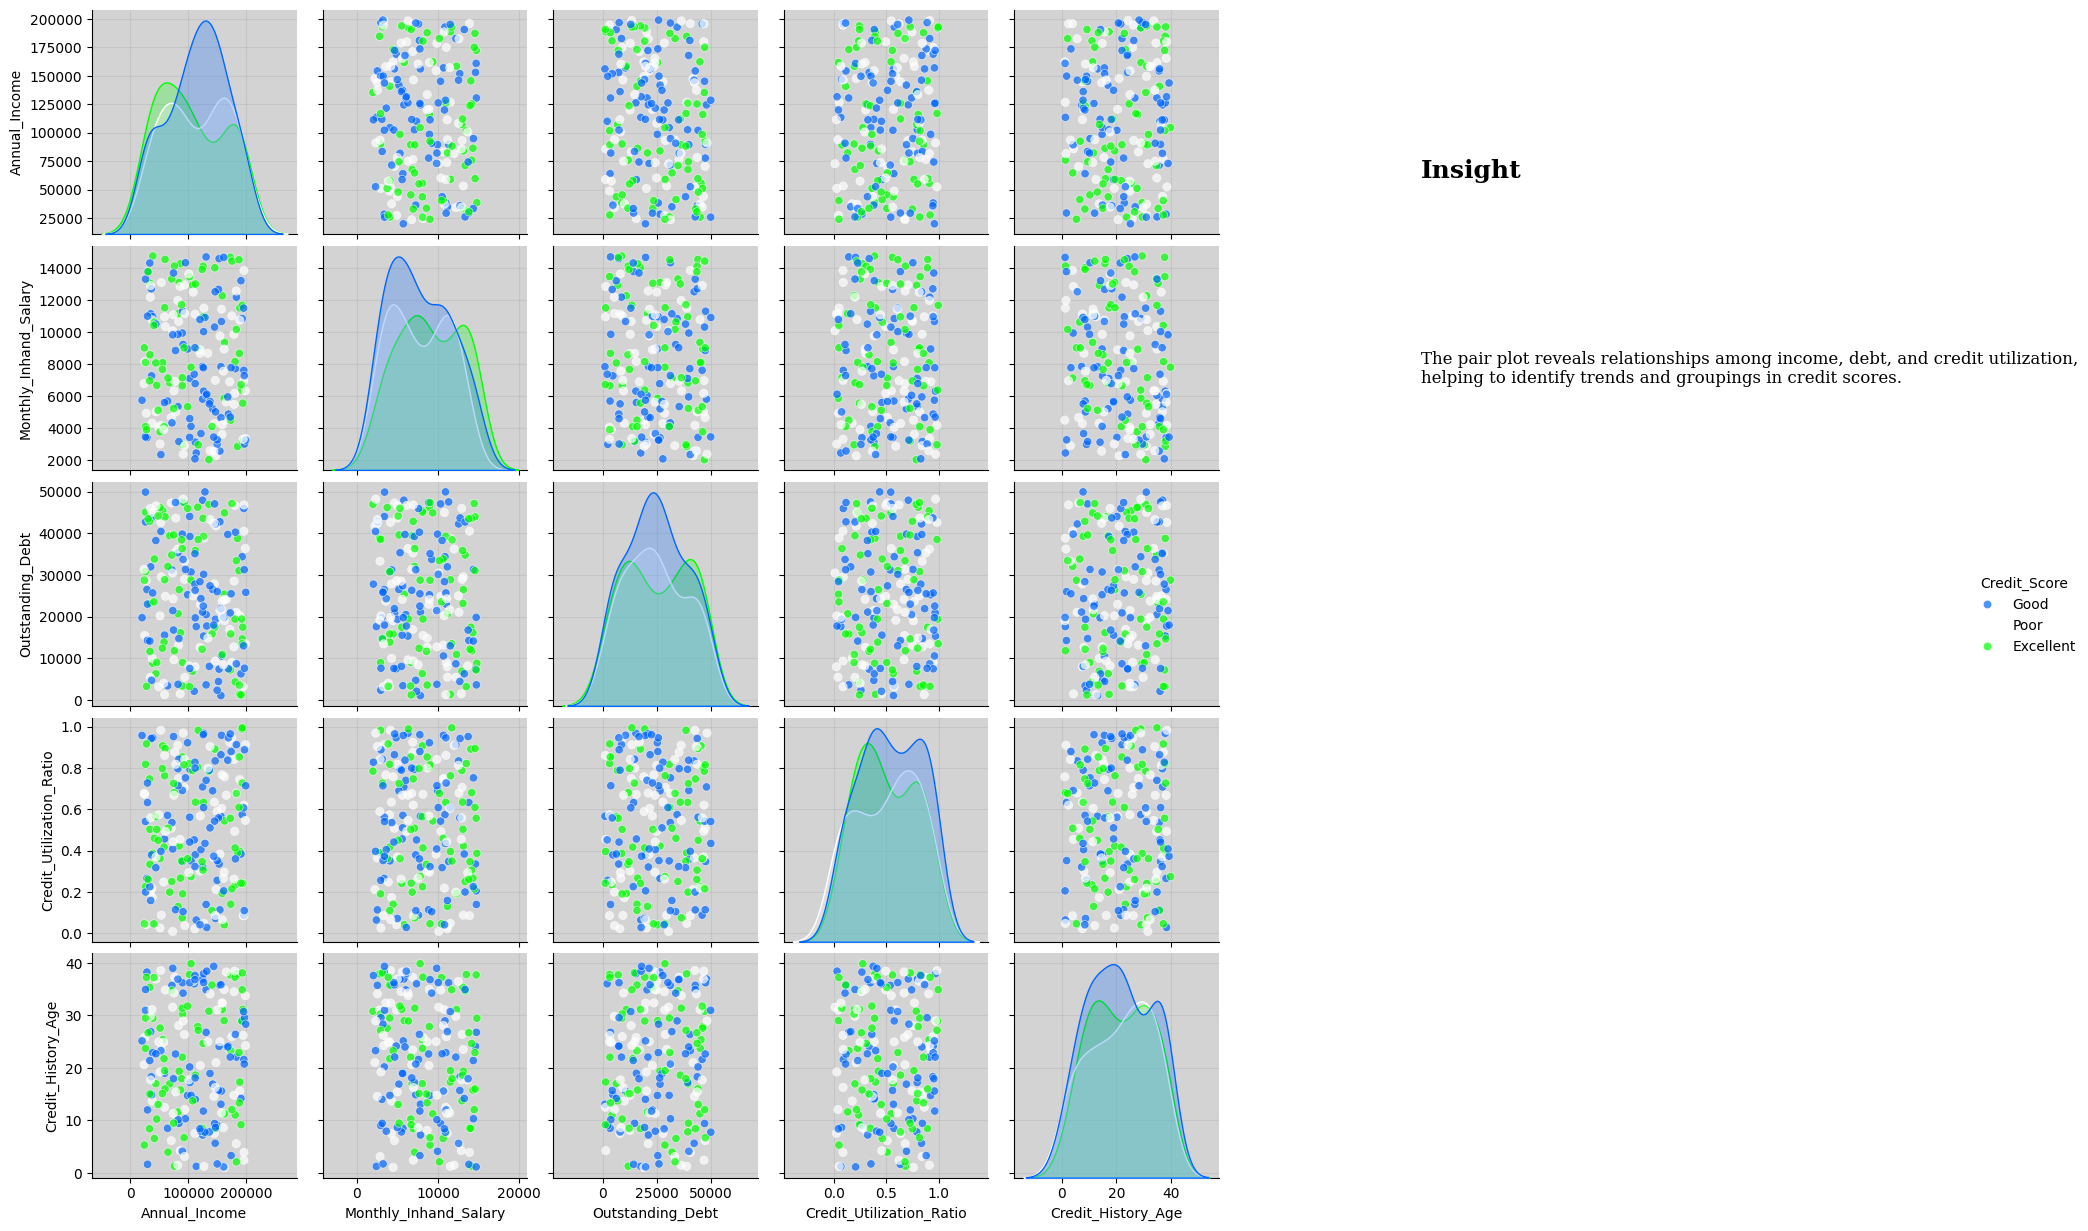

In [352]:
palette = {
    'Good': '#0066ff',
    'Standard': '#000000',
    'Poor': '#FFFFFF',
    'Excellent': '#00FF00'  
}

# Create pair plot
fig = sns.pairplot(bank_df[['Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt', 
                              'Credit_Utilization_Ratio', 'Credit_History_Age', 
                              'Credit_Score']], 
                   hue='Credit_Score', 
                   palette=palette, 
                   diag_kind='kde', 
                   plot_kws={'alpha': 0.7})

for ax in fig.axes.flatten():
    ax.set_facecolor('#D3D3D3')  
    ax.grid(axis='both', linestyle='-', alpha=0.4)  
    ax.set_axisbelow(True)  

fig.fig.text(1.05, 0.85, 'Insight', fontsize=18, fontweight='bold', fontfamily='serif')
fig.fig.text(1.05, 0.67, '''
The pair plot reveals relationships among income, debt, and credit utilization,
helping to identify trends and groupings in credit scores.
''', fontsize=12, fontfamily='serif')

plt.show()

# **Conclusion**

The analysis of customer data provides valuable insights into the factors influencing credit scores and offers guidance for Paisabazaar's credit assessment processes. Key findings include a focus on the working population aged 25-45, a significant portion of customers with moderate to high earning capacity, a balanced credit score distribution with a notable portion having poor credit scores, responsible credit management among customers, a competitive market with varying interest rates, and the importance of age, income, credit utilization, and payment history in influencing credit scores. These findings offer valuable insights for Paisabazaar to refine their credit assessment models and improve risk management strategies by focusing on specific customer segments and tailoring their financial product offerings. Additionally, the analysis highlights the need for continuous monitoring of credit score trends and customer behavior to stay updated with evolving financial landscapes.